## Homicide Reports, 1980 - 2014 

**Description of the Dataset**

The Murder Accountability Project is the most complete database of homicides in the United States currently available. This dataset includes murders from the FBI's Supplementary Homicide Report from 1976 to the present and Freedom of Information Act data on more than 22,000 homicides that were not reported to the Justice Department. This dataset includes the age, race, sex, ethnicity of victims and perpetrators, in addition to the relationship between the victim and perpetrator and weapon used.

**Data Collection Process**

The data was compiled and made available by the Murder Accountability Project, founded by Thomas Hargrove. According to the organization, the data "includes murders from the FBI’s Supplementary Homicide Report from 1976 to the present and Freedom of Information Act data on more than 22,000 homicides that were not reported to the Justice Department. This dataset includes the age, race, sex, ethnicity of victims and perpetrators, in addition to the relationship between the victim and perpetrator and weapon used.”



## Import
Import **numpy**, **pandas** and **matplotlib**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

## Dataset

For this notebook we will be working on a dataset called homicidesreport. This dataset contains information on murders from the FBI's Supplementary Homicide Report from 1976 to the present and Freedom of Information Act data on more than 22,000 homicides that were not reported to the Justice Department.


**Dataset Structure**

The dataset contains 638,454 **observations** (rows) which each represent a homicide report across 24 **variables** (columns). The following are the descriptions of each variable in the dataset.




- **`recordid`**: record id number (numeric: 1 - 638454)

- **`agencycode`**: (a six-digit alphanumeric code used to classify accounts by the federal or non-federal agency) 

- **`agencyname`**: name of agency
- **`agencytype`**: type of agency 

- **`city`**: city where the homicide incident occured 
- **`state`**: state where the homicide incident occurred 

- **`year`**: year of the given report, ranging from 1980-2014
- **`month`**: month of the given report
- **`incident`**: how many incidences occured in the report
- **`crimetype`**:  (Murder or Mansloughter or Mansloughter by negligence)
- **`crimesolved`**: indicates if crime was solved (yes or no)
- **`victimsex`**: gender of victim
- **`victimage`**: age of victim
- **`victimerace`**:  (Native American/Alaska Native, White, Black, Unknown, Asian/Pacific Islander)
- **`victimethnicity`**:  (Unknown, Not Hispanic, Hispanic)
- **`perpetratorsex`**: gender of perpetrator
- **`perpetratorage`**: age of perpetrator
- **`perpetratorrace`**:  (Native American/Alaska Native, White, Black, Unknown, Asian/Pacific Islander)
- **`perpetratorethnicity`**: (Unknown, Not Hispanic, Hispanic)
- **`relationship`**:  (Victim of a crime i.e. Son)
- **`weapon`**: weapon used to commit the homicide 
- **`victimcount`**: count of victims in the report
- **`perpetratorcount`**: count of perpetrators in the report
- **`recordsource`**: source of the record




## Reading the Dataset

Our first step is to load the dataset using `pandas`. This will load the dataset into a pandas `DataFrame`. 
To load the dataset, we use the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) 
function. Note that you may need to change the path depending on the location of the file in your machine.


In [2]:
homrep_df = pd.read_csv("homicidereports.csv", low_memory=False)

Whenever we load a new dataset, it is generally a good idea to call the info function, which displays general information about the dataset.

In [3]:
homrep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

To visualize the table, we can call the head function to display the first n rows of the dataset.

In [4]:
homrep_df.head(10)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
5,6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,...,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,...,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI
7,8,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,1,Murder or Manslaughter,...,Unknown,Male,35,White,Unknown,Wife,Knife,0,0,FBI
8,9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
9,10,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,...,Unknown,Male,40,Unknown,Unknown,Unknown,Firearm,0,1,FBI


We can call also call the tail function to display the last n rows of the dataset.

In [5]:
homrep_df.tail(638453)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
5,6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,...,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


## Data Cleaning

Data Cleaning is performed to correct missing, inaccurate, or inconsistent data.

Let us first check the dataset information.

In [6]:
homrep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

### `Perpetrator Age` variable


Upon examining the data, we see that `Perpetrator Age` data type is `object` when it should be `integer`. 

Here we display all the unique values of the `Perpetrator Age`:

In [7]:
homrep_df['Perpetrator Age'].unique()

array(['15', '42', '0', '36', '27', '35', '40', '49', '39', '29', '19',
       '23', '33', '26', '41', '28', '61', '25', '7', '17', '34', '21',
       '43', '38', '66', '32', '37', '22', '30', '24', '65', '51', '60',
       '45', '64', '18', '20', '44', '73', '62', '69', '52', '16', '90',
       '56', '47', '57', '31', '46', '14', '55', '50', '54', '68', '77',
       '53', '67', '48', '76', '58', '71', '63', '89', '13', '75', '72',
       '93', '59', '10', '11', '79', '74', '99', '70', '78', '80', '9',
       '12', '81', '6', '87', '82', '83', '8', '84', '85', '86', '5', '3',
       '1', '88', '95', '4', '91', '92', '96', '94', '2', '98', '97', ' '],
      dtype=object)

In [8]:
homrep_df['Perpetrator Age'].value_counts()

0     216327
20     21625
19     20250
21     18983
18     18834
       ...  
98         7
96         7
2          6
97         3
           1
Name: Perpetrator Age, Length: 101, dtype: int64

We see that a lot of the `Perpetrator Age` is 0 and there is an entry with a blank value. We replace the blank value with 0 so that we can convert them to a NaN data type later on. We also convert the the datatype to integer.

In [9]:
# copy of original data 
homrep_df_copy = homrep_df.copy()

# replacing blank values with zeros
homrep_df_copy['Perpetrator Age'] = homrep_df_copy['Perpetrator Age'].replace(" ", 0)

# converting to integers
homrep_df_copy['Perpetrator Age'] = homrep_df_copy['Perpetrator Age'].astype(str).astype(int)

# Check values if converted to integer
homrep_df_copy['Perpetrator Age'].unique()

array([15, 42,  0, 36, 27, 35, 40, 49, 39, 29, 19, 23, 33, 26, 41, 28, 61,
       25,  7, 17, 34, 21, 43, 38, 66, 32, 37, 22, 30, 24, 65, 51, 60, 45,
       64, 18, 20, 44, 73, 62, 69, 52, 16, 90, 56, 47, 57, 31, 46, 14, 55,
       50, 54, 68, 77, 53, 67, 48, 76, 58, 71, 63, 89, 13, 75, 72, 93, 59,
       10, 11, 79, 74, 99, 70, 78, 80,  9, 12, 81,  6, 87, 82, 83,  8, 84,
       85, 86,  5,  3,  1, 88, 95,  4, 91, 92, 96, 94,  2, 98, 97])

Next, we convert all ages 0 to NaN data type. 

In [10]:
zero = homrep_df_copy["Perpetrator Age"] < 1

# replace all 0 values with NaN for that column
homrep_df_copy["Perpetrator Age"][zero] = np.nan

# displaying new value count after removing 0 values
homrep_df_copy['Perpetrator Age'].value_counts()

<ipython-input-10-ad816b084d92>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homrep_df_copy["Perpetrator Age"][zero] = np.nan


20.0    21625
19.0    20250
21.0    18983
18.0    18834
22.0    18433
        ...  
95.0        9
96.0        7
98.0        7
2.0         6
97.0        3
Name: Perpetrator Age, Length: 99, dtype: int64

### `Victim Age` variable


Upon examining the `Victim Age` variable below, there is an error value which is 998. 

In [11]:
homrep_df['Victim Age'].unique()

array([ 14,  43,  30,  42,  99,  32,  38,  36,  20,  48,  31,  16,  33,
        27,  21,  60,  40,  18,   8,  25,  24,  46,  23,  22,  45,  26,
        58,  17,  29,  41,  68,  13,  35,  44,  54,  37,  51,  90,  50,
        52,  61,  63,  19,  28,  70,  72,  74,  53,  57,  76,  79,  69,
        34,  66,  55,  67,  65,  47,   1,  49,  62,  75,  56,  59,  78,
        39,  15,   0,  71,  77,   2,   4,  64,  82,  85,   6,   5,   7,
         9,  84,  10,  86,  11,  73,  83, 998,  81,  87,  80,   3,  12,
        94,  93,  92,  89,  97,  88,  91,  95,  98,  96])

We will remove the error value and replace it with a NaN value since nobody could be 998 years old.

In [12]:
# subset the age 998
age_limit = homrep_df_copy["Victim Age"] == 998

# replace the 998 value with NaN 
homrep_df_copy["Victim Age"][age_limit] = np.nan


# displaying the unique values after removing 998
homrep_df_copy['Victim Age'].unique()

<ipython-input-12-ba69f11b51c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homrep_df_copy["Victim Age"][age_limit] = np.nan


array([14., 43., 30., 42., 99., 32., 38., 36., 20., 48., 31., 16., 33.,
       27., 21., 60., 40., 18.,  8., 25., 24., 46., 23., 22., 45., 26.,
       58., 17., 29., 41., 68., 13., 35., 44., 54., 37., 51., 90., 50.,
       52., 61., 63., 19., 28., 70., 72., 74., 53., 57., 76., 79., 69.,
       34., 66., 55., 67., 65., 47.,  1., 49., 62., 75., 56., 59., 78.,
       39., 15.,  0., 71., 77.,  2.,  4., 64., 82., 85.,  6.,  5.,  7.,
        9., 84., 10., 86., 11., 73., 83., nan, 81., 87., 80.,  3., 12.,
       94., 93., 92., 89., 97., 88., 91., 95., 98., 96.])

  We will now interpolate the missing values in Victim Age and Perpetrator Age.

In [13]:
# interapolate missing values
homrep_df_copy = homrep_df_copy.interpolate()

# Convert the column type to integers
homrep_df_copy['Perpetrator Age'] = homrep_df_copy['Perpetrator Age'].astype(int)
homrep_df_copy['Victim Age'] = homrep_df_copy['Victim Age'].astype(int)

# Check if the data is converted 
homrep_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

### `Crime Type` variable


Check if the values for the`Crime Type`varible is either Murder or Manslaughter or Manslaughter by negligence.

In [14]:
homrep_df_copy['Crime Type'].unique()

array(['Murder or Manslaughter', 'Manslaughter by Negligence'],
      dtype=object)

### `Perpetrator Ethnicity` variable


Check if values for `Perpetrator Ethnicity` variable is Unknown, Not Hispanic, Hispanic.

In [15]:
homrep_df_copy['Perpetrator Ethnicity'].unique()

array(['Unknown', 'Not Hispanic', 'Hispanic'], dtype=object)

### `Victim Ethnicity` variable


Check if values for `Victim Ethnicity` variable is Unknown, Not Hispanic, Hispanic.

In [16]:
homrep_df_copy['Victim Ethnicity'].unique()

array(['Unknown', 'Not Hispanic', 'Hispanic'], dtype=object)

### `Perpetrator Sex` variable


Check if values for `Perpetrator Sex` variable is Male, Female, or Unknown.

In [17]:
homrep_df_copy['Perpetrator Sex'].unique()

array(['Male', 'Unknown', 'Female'], dtype=object)

### `Victim Sex` variable

Check if values for `Victim Sex` variable is Male, Female, or Unknown.

In [18]:
homrep_df_copy['Victim Sex'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

### `Crime Solved` variable

Check if values for `Crime Solved` variable is Yes or No.

In [19]:
homrep_df_copy['Crime Solved'].unique()

array(['Yes', 'No'], dtype=object)

### `Year` variable

Check if values for `Year` variable is within the range 1980-2014. To confirm this, the total count should be the total number of observations which is 638, 454.

In [20]:
homrep_df_copy['Year'].between(1980,2014).count()

638454

### `Month` variable

Check if values for `Month` variable is valid and does not contain spelling errors.

In [21]:
homrep_df_copy['Month'].unique()

array(['January', 'March', 'April', 'May', 'June', 'July', 'August',
       'December', 'November', 'February', 'October', 'September'],
      dtype=object)

### `Victim Race` variable

Check if values for `Victim Race` variable is valid and does not contain spelling errors.

In [22]:
homrep_df_copy['Victim Race'].unique()

array(['Native American/Alaska Native', 'White', 'Black', 'Unknown',
       'Asian/Pacific Islander'], dtype=object)

### `Perpetrator Race` variable

Check if values for `Perpetrator Race` variable is valid and does not contain spelling errors.

In [23]:
homrep_df_copy['Perpetrator Race'].unique()

array(['Native American/Alaska Native', 'White', 'Unknown', 'Black',
       'Asian/Pacific Islander'], dtype=object)

### `State` variable

Check if values for `State` variable is valid and does not contain spelling errors.

In [24]:
homrep_df_copy['State'].unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
       'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
       'Mississippi', 'Montana', 'Nebraska', 'North Carolina',
       'North Dakota', 'New Hampshire', 'New Jersey', 'New Mexico',
       'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhodes Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington', 'Wisconsin',
       'West Virginia', 'Wyoming'], dtype=object)

### `Weapon` variable

Check if values for `Weapon` variable is valid and does not contain spelling errors.

In [25]:
homrep_df_copy['Weapon'].unique()

array(['Blunt Object', 'Strangulation', 'Unknown', 'Rifle', 'Knife',
       'Firearm', 'Shotgun', 'Fall', 'Handgun', 'Drowning', 'Suffocation',
       'Explosives', 'Fire', 'Drugs', 'Gun', 'Poison'], dtype=object)


Upon analysis of the data below, almost all unsolved crimes have 0 as the Perpetrator Age

In [26]:

homrep_df_copy[homrep_df_copy["Crime Solved"]=="No"].count()

Record ID                190282
Agency Code              190282
Agency Name              190282
Agency Type              190282
City                     190282
State                    190282
Year                     190282
Month                    190282
Incident                 190282
Crime Type               190282
Crime Solved             190282
Victim Sex               190282
Victim Age               190282
Victim Race              190282
Victim Ethnicity         190282
Perpetrator Sex          190282
Perpetrator Age          190282
Perpetrator Race         190282
Perpetrator Ethnicity    190282
Relationship             190282
Weapon                   190282
Victim Count             190282
Perpetrator Count        190282
Record Source            190282
dtype: int64

In [27]:
homrep_df[(homrep_df["Crime Solved"]=="No") & (homrep_df["Perpetrator Age"]=="0")].count()

Record ID                189627
Agency Code              189627
Agency Name              189627
Agency Type              189627
City                     189627
State                    189627
Year                     189627
Month                    189627
Incident                 189627
Crime Type               189627
Crime Solved             189627
Victim Sex               189627
Victim Age               189627
Victim Race              189627
Victim Ethnicity         189627
Perpetrator Sex          189627
Perpetrator Age          189627
Perpetrator Race         189627
Perpetrator Ethnicity    189627
Relationship             189627
Weapon                   189627
Victim Count             189627
Perpetrator Count        189627
Record Source            189627
dtype: int64

We also observed a pattern for `Perpetrator Ethnicity`,  ` Victim Ethnicity`, `Perpetrator Count` , and `Victim Count` 

In [28]:
homrep_df[(homrep_df["Crime Solved"]=="No") & (homrep_df["Perpetrator Ethnicity"]=='Unknown')].count()



Record ID                190036
Agency Code              190036
Agency Name              190036
Agency Type              190036
City                     190036
State                    190036
Year                     190036
Month                    190036
Incident                 190036
Crime Type               190036
Crime Solved             190036
Victim Sex               190036
Victim Age               190036
Victim Race              190036
Victim Ethnicity         190036
Perpetrator Sex          190036
Perpetrator Age          190036
Perpetrator Race         190036
Perpetrator Ethnicity    190036
Relationship             190036
Weapon                   190036
Victim Count             190036
Perpetrator Count        190036
Record Source            190036
dtype: int64

In [29]:
homrep_df[(homrep_df["Crime Solved"]=="No") & (homrep_df["Victim Ethnicity"]=='Unknown')].count()

Record ID                113271
Agency Code              113271
Agency Name              113271
Agency Type              113271
City                     113271
State                    113271
Year                     113271
Month                    113271
Incident                 113271
Crime Type               113271
Crime Solved             113271
Victim Sex               113271
Victim Age               113271
Victim Race              113271
Victim Ethnicity         113271
Perpetrator Sex          113271
Perpetrator Age          113271
Perpetrator Race         113271
Perpetrator Ethnicity    113271
Relationship             113271
Weapon                   113271
Victim Count             113271
Perpetrator Count        113271
Record Source            113271
dtype: int64

In [30]:
homrep_df[(homrep_df["Crime Solved"]=="No") & (homrep_df["Perpetrator Count"]==0)].count()

Record ID                184069
Agency Code              184069
Agency Name              184069
Agency Type              184069
City                     184069
State                    184069
Year                     184069
Month                    184069
Incident                 184069
Crime Type               184069
Crime Solved             184069
Victim Sex               184069
Victim Age               184069
Victim Race              184069
Victim Ethnicity         184069
Perpetrator Sex          184069
Perpetrator Age          184069
Perpetrator Race         184069
Perpetrator Ethnicity    184069
Relationship             184069
Weapon                   184069
Victim Count             184069
Perpetrator Count        184069
Record Source            184069
dtype: int64

Since the `Victim Count` and `Perpetrator Count` 0 values correlate with the unsolved crimes, we regard these zero values as null values and convert it to NaN data type.

In [31]:
# subset the Perpetrator Count 0
pepr_count = homrep_df_copy["Perpetrator Count"] == 0

# replace them with nan values for that column
homrep_df_copy["Perpetrator Count"][pepr_count] = np.nan

# subset the Victim Count 0
vic_count = homrep_df_copy["Victim Count"] == 0

# replace them with nan values for that column
homrep_df_copy["Victim Count"][vic_count] = np.nan

# Mean of perpetrator and victim count
perp_mean = homrep_df_copy["Perpetrator Count"].mean()
vic_mean = homrep_df_copy["Victim Count"].mean()

# Filling missing values with the mean
homrep_df_copy["Perpetrator Count"] = homrep_df_copy["Perpetrator Count"].fillna(perp_mean).round()
homrep_df_copy["Victim Count"] = homrep_df_copy["Victim Count"].fillna(vic_mean).round()

# Convert from float to integer
homrep_df_copy["Perpetrator Count"] = homrep_df_copy["Perpetrator Count"].astype(int)
homrep_df_copy["Victim Count"] = homrep_df_copy["Victim Count"].astype(int)

homrep_df_copy.info()

<ipython-input-31-c1b79d22d688>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homrep_df_copy["Perpetrator Count"][pepr_count] = np.nan
<ipython-input-31-c1b79d22d688>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homrep_df_copy["Victim Count"][vic_count] = np.nan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 n

## Exploratory Data Analysis

Let's play around with the data that we have and see what we can find.

The first 5 phases of the EDA will be checking each variable against the total number of cases. The rest of the phases will be a way to examine correlations between variables.

At the end of it, we will be identifying and answering the 3 interesting EDA questions based on what was found during the phases.

Phase 1: Analyzing the "State" and "City" variable against the total cases

Steps:
1. Sort the States in descending order to determine which states have the most homicide reports
2. Determine which states share the most concentration of homicide reports
3. Visialize the information received using a graph
4. Repeat steps 1-3 for the Cities. It is also better to include its corresponsing State since it would make the data much more meaningful.

Findings:
<li>Almost a third of all homicide cases have been committed in just 3 States: California, Texas, New York</li>
<li>Among the top 50 cities, California holds the record for the state with the highest number of cities with reported homicide (10), followed by Florida (5), and Texas (4), other than these 3, all reported homicides in all other states have been committed in only 1 or 2 cities.</li>
<li>When analyzing it collectively, however, Texas has by far the highest number of cities with Homicide reports at 131 cities. This is followed by North Carolina at 92 and Georgia at 90.</li>

In [32]:
test_df = homrep_df_copy.groupby('State')
test_df['State'].count().sort_values(ascending=False)
test_df['State'].count().sort_values(ascending=False).head(3).sum() / 638454
#0.3307145072315312

0.3307145072315312

In [33]:
test_df['State'].count().sort_values(ascending=False).head(20)

State
California        99783
Texas             62095
New York          49268
Florida           37164
Michigan          28448
Illinois          25871
Pennsylvania      24236
Georgia           21088
North Carolina    20390
Louisiana         19629
Ohio              19158
Maryland          17312
Virginia          15520
Tennessee         14930
Missouri          14832
New Jersey        14132
Arizona           12871
South Carolina    11698
Indiana           11463
Alabama           11376
Name: State, dtype: int64

Text(0.5, 1.0, 'Homicide Count Per State')

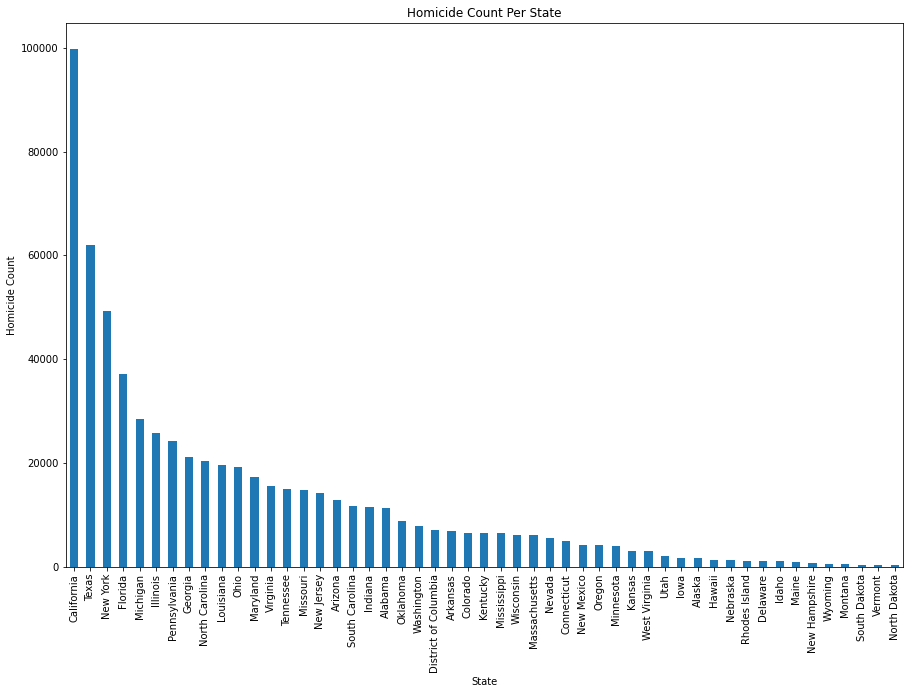

In [34]:
graph_df = homrep_df_copy['State'].value_counts()
graph_df.plot.bar(figsize=(15,10))
plt.xlabel('State')
plt.ylabel('Homicide Count')
plt.title('Homicide Count Per State')

In [35]:
test_df = homrep_df_copy.groupby(['City', 'State'])
test_df['City'].count().sort_values(ascending=False).head(50)

City                  State               
Los Angeles           California              44511
New York              New York                38431
Cook                  Illinois                22338
Wayne                 Michigan                19038
Harris                Texas                   16300
Philadelphia          Pennsylvania            12851
Dallas                Texas                   11148
Baltimore city        Maryland                 9336
Dade                  Florida                  9054
Maricopa              Arizona                  8582
Orleans               Louisiana                7847
District of Columbia  District of Columbia     7115
Fulton                Georgia                  6387
St. Louis city        Missouri                 5955
San Bernardino        California               5717
Shelby                Tennessee                5615
Alameda               California               5551
Bexar                 Texas                    5522
San Diego            

In [36]:
test_df = homrep_df_copy.groupby(['City','State'])
calculate_df = test_df['State'].count().sort_values(ascending=False).head(50)
calculate_df.groupby('State').count().sort_values(ascending=False)

State
California              10
Florida                  5
Texas                    4
Missouri                 2
Tennessee                2
Indiana                  2
Louisiana                2
Maryland                 2
Pennsylvania             2
Arizona                  2
Ohio                     2
New York                 1
Washington               1
Virginia                 1
Oklahoma                 1
North Carolina           1
Alabama                  1
New Jersey               1
Nevada                   1
Michigan                 1
Massachusetts            1
Illinois                 1
Georgia                  1
District of Columbia     1
Colorado                 1
Wisconsin                1
Name: State, dtype: int64

In [37]:
test_df = homrep_df_copy.groupby(['City','State'])
calculate_df = test_df['State'].count().sort_values(ascending=False)
calculate_df.groupby('State').nunique().sort_values(ascending=True)

State
District of Columbia      1
Delaware                  3
Rhodes Island             4
Hawaii                    4
Connecticut               8
New Hampshire            10
Alaska                   14
South Dakota             14
Massachusetts            14
Vermont                  14
Arizona                  15
North Dakota             15
Maine                    16
Nevada                   17
Montana                  19
Wyoming                  22
New Jersey               22
Utah                     23
Nebraska                 23
Maryland                 24
New Mexico               26
Idaho                    30
Iowa                     31
Kansas                   31
Oregon                   32
Washington               34
Minnesota                35
Illinois                 36
West Virginia            36
Colorado                 39
South Carolina           43
Wisconsin                45
New York                 50
Indiana                  52
Arkansas                 52
Louisiana     

<AxesSubplot:ylabel='State'>

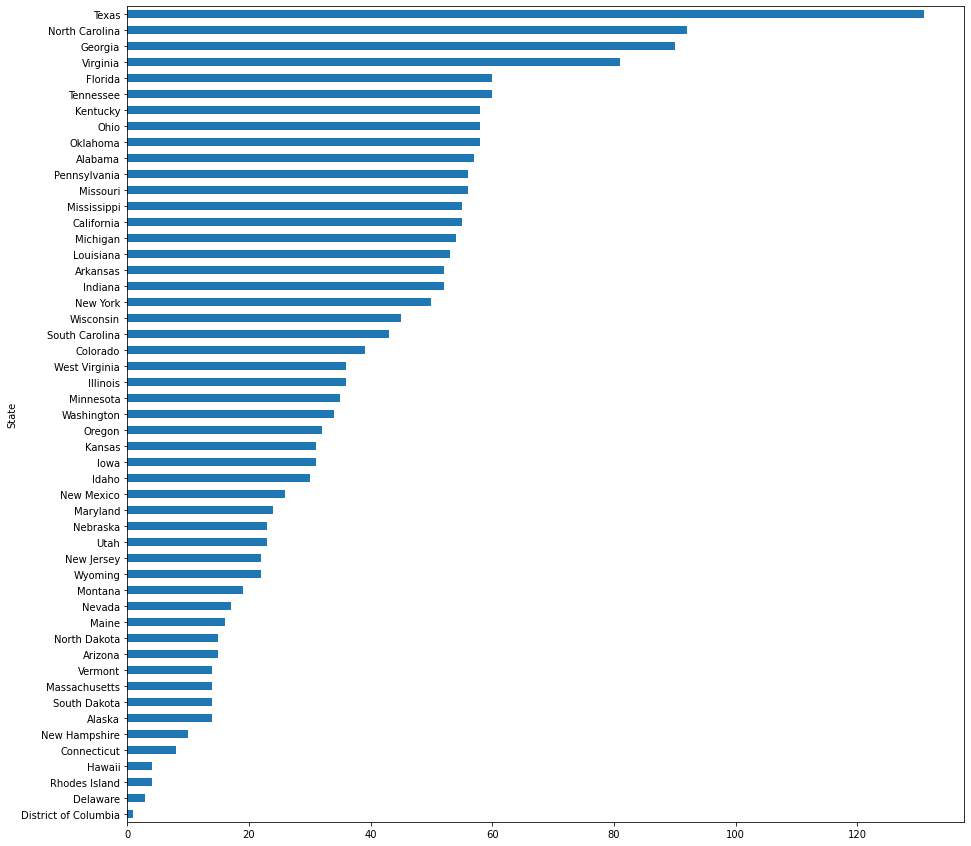

In [38]:
calculate_df.groupby('State').nunique().sort_values().plot(kind="barh", figsize=(15,15))

Phase 2: Analyzing the Perpetrator (Sex, Age, Race, Ethnicity)

Steps:
1. Determine the count of the Perpetrator Sex
2. Determine the count of the Perpetrator Age, and also analyze where the ages tend towards
3. Determine the count of the Perpetrator Race
4. Determine the count of the Perpetrator Ethnicity

Findings:
<li>At least from what is known, the number of Male perpetrators far exceed the number of Female perpetrators, with 8.22 males for every female</li>
<li>More than half of all cases lies within the ages 18-29</li>
<li>After this, the number of homicide cases steadily drops the older the age gets</li>
<li>The only outlier here is the age of "99", where about as much homicides were committed at this age as at age "88"</li>
<li>At least from what is known, the number of black perpetrators compared to white are almost equivalent, with a small margin of around 4000 between them. Asians and other ethnicities contribute a small proportion of the number of known perpetrators, with asians being as little as 2.8% the number of either blacks or whites, and other ethnicities even less so</li>

In [39]:
test_df = homrep_df_copy.groupby('Perpetrator Sex')
test_df['Perpetrator Sex'].count()

Perpetrator Sex
Female      48548
Male       399541
Unknown    190365
Name: Perpetrator Sex, dtype: int64

In [40]:
test_df = homrep_df_copy.groupby('Perpetrator Age')
test_df['Perpetrator Age'].count().sort_values(ascending=False).head(50)
#Sum = 638454

Perpetrator Age
20    31679
21    29653
22    29378
19    28971
23    28505
25    28265
24    27281
18    25678
26    25108
27    23962
28    22871
30    21996
29    21399
31    18607
17    18411
32    18084
33    16393
34    15409
35    15400
36    13350
37    12554
16    11677
38    11512
39    10777
40    10539
41     9262
42     8620
43     7969
44     7285
45     6956
15     6407
46     5793
47     5696
48     5244
49     4842
50     4567
51     3964
52     3597
53     3285
54     2979
14     2911
55     2798
56     2479
57     2201
58     2031
59     1882
60     1682
61     1486
62     1339
13     1243
Name: Perpetrator Age, dtype: int64

In [41]:
test_df = homrep_df_copy[homrep_df_copy['Perpetrator Age'] >= 18].groupby('Perpetrator Age')
test_df['Perpetrator Age'].count().head(12).sum()

322750

In [42]:
test_df['Perpetrator Age'].count().sort_values(ascending=False).head(12)

Perpetrator Age
20    31679
21    29653
22    29378
19    28971
23    28505
25    28265
24    27281
18    25678
26    25108
27    23962
28    22871
30    21996
Name: Perpetrator Age, dtype: int64

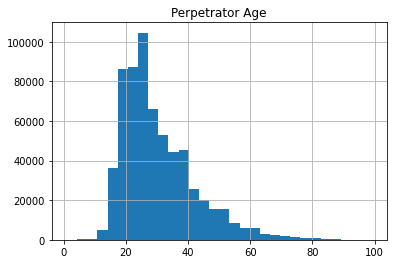

In [43]:
homrep_df_copy.hist("Perpetrator Age", bins=30)
plt.show()

In [44]:
test_df = homrep_df_copy.groupby('Perpetrator Race')
test_df['Perpetrator Race'].count().sort_values()

Perpetrator Race
Native American/Alaska Native      3602
Asian/Pacific Islander             6046
Unknown                          196047
Black                            214516
White                            218243
Name: Perpetrator Race, dtype: int64

<AxesSubplot:xlabel='Perpetrator Race'>

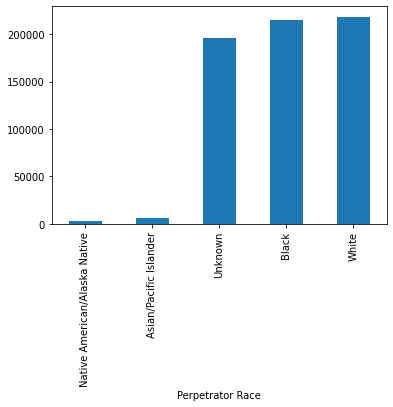

In [45]:
test_df['Perpetrator Race'].count().sort_values().plot(kind='bar')

In [46]:
test_df = homrep_df_copy.groupby('Perpetrator Ethnicity')
test_df['Perpetrator Ethnicity'].count()

Perpetrator Ethnicity
Hispanic         46872
Not Hispanic    145172
Unknown         446410
Name: Perpetrator Ethnicity, dtype: int64

In [47]:
test_df = homrep_df_copy.groupby(['Perpetrator Race','Perpetrator Ethnicity'])
test_df['Perpetrator Race'].count()

Perpetrator Race               Perpetrator Ethnicity
Asian/Pacific Islander         Hispanic                     48
                               Not Hispanic               3316
                               Unknown                    2682
Black                          Hispanic                    875
                               Not Hispanic              75704
                               Unknown                  137937
Native American/Alaska Native  Hispanic                     17
                               Not Hispanic               1542
                               Unknown                    2043
Unknown                        Hispanic                    165
                               Not Hispanic                404
                               Unknown                  195478
White                          Hispanic                  45767
                               Not Hispanic              64206
                               Unknown                  108270
Na

In [48]:
test_df = homrep_df_copy.groupby(['Perpetrator Age','Perpetrator Race', 'Perpetrator Ethnicity', 'Perpetrator Sex'])
homrep_df_copy.groupby(['Perpetrator Age','Perpetrator Race', 'Perpetrator Ethnicity', 'Perpetrator Sex']).Weapon.count().sort_values(ascending=False).head(50)

Perpetrator Age  Perpetrator Race  Perpetrator Ethnicity  Perpetrator Sex
22               Unknown           Unknown                Unknown            9593
24               Unknown           Unknown                Unknown            9565
23               Unknown           Unknown                Unknown            9554
25               Unknown           Unknown                Unknown            9530
21               Unknown           Unknown                Unknown            9337
26               Unknown           Unknown                Unknown            9068
20               Unknown           Unknown                Unknown            8779
27               Unknown           Unknown                Unknown            8601
28               Unknown           Unknown                Unknown            8232
20               Black             Unknown                Male               8182
19               Black             Unknown                Male               7828
29               Unknown

Phase 3: Analyzing the Victim (Sex, Age, Race, Ethnicity)

Steps:
1. Determine the count of the Victim Sex
2. Determine the count of the Victim Age, and also analyze where the ages tend towards
3. Determine the count of the Victim Race
4. Determine the count of the Victim Ethnicity

Findings:
<li>The Sex of the Victim, this time, is far more known than that of the Perpetrator</li>
<li>From what is known, much like in the perpetrators, the number of Male victims exceed that of Female victims. This time however, the ratio is much lower, at 3.44 males per female</li>
<li>The age distribution of the Victims is similar to that of the Perpetrators, as it also follows the same pattern, although it is noticeably more distributed than that of the Perpetrators. 
<li>Black victims have a slightly less count than white victims, by a difference of about 17k. With that being said, they still hold an overwhelming majority compared to the other races</li>
<li>Asians hold a slightly higher proportion of victims compared to blacks at 3.3%, and 3.1% for whites</li>

In [49]:
test_df = homrep_df_copy.groupby('Victim Sex')
test_df['Victim Sex'].count()

Victim Sex
Female     143345
Male       494125
Unknown       984
Name: Victim Sex, dtype: int64

In [50]:
test_df = homrep_df_copy.groupby('Victim Age')
test_df['Victim Age'].count().sort_values(ascending=False).head(50)
#Sum = 638454

Victim Age
22    23064
20    23052
25    22973
21    22813
23    22470
19    21960
24    21865
26    20510
27    19487
30    18988
18    18480
28    18232
29    18065
32    15855
31    15788
33    14505
35    14344
34    14332
17    14036
36    12527
37    11848
38    11431
40    11182
39    10940
42     9629
41     9610
16     9408
99     9291
43     8641
0      8445
45     8167
44     7933
46     7352
47     6918
48     6383
50     6341
49     6159
15     5911
1      5526
51     5284
52     5210
53     4799
54     4470
55     4251
56     3943
2      3805
57     3728
14     3346
58     3279
59     3193
Name: Victim Age, dtype: int64

In [51]:
test_df['Victim Age'].count().sort_values(ascending=False).head(12).sum()
#Sum = 638454

253894

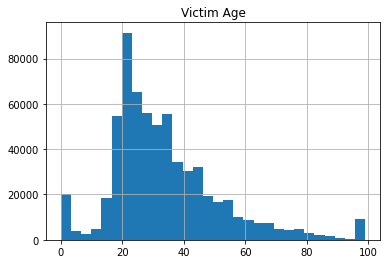

In [52]:
homrep_df_copy.hist("Victim Age", bins=30)
plt.show()

In [53]:
test_df = homrep_df_copy.groupby('Victim Race')
test_df['Victim Race'].count().sort_values(ascending=False)

Victim Race
White                            317422
Black                            299899
Asian/Pacific Islander             9890
Unknown                            6676
Native American/Alaska Native      4567
Name: Victim Race, dtype: int64

<AxesSubplot:xlabel='Victim Race'>

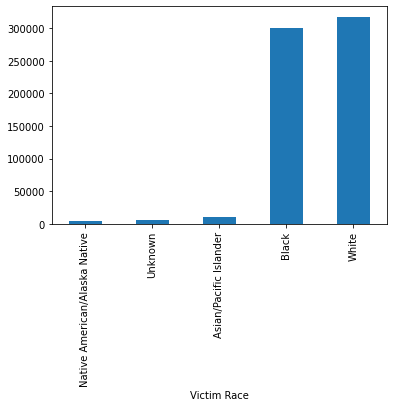

In [54]:
test_df['Victim Race'].count().sort_values().plot(kind="bar")

In [55]:
test_df = homrep_df_copy.groupby('Victim Ethnicity')
test_df['Victim Ethnicity'].count().sort_values(ascending=False)

Victim Ethnicity
Unknown         368303
Not Hispanic    197499
Hispanic         72652
Name: Victim Ethnicity, dtype: int64

In [56]:
test_df = homrep_df_copy.groupby(['Victim Ethnicity','Victim Race'])
test_df['Victim Ethnicity'].count()

Victim Ethnicity  Victim Race                  
Hispanic          Asian/Pacific Islander               52
                  Black                              1213
                  Native American/Alaska Native        11
                  Unknown                             177
                  White                             71199
Not Hispanic      Asian/Pacific Islander             5568
                  Black                            100973
                  Native American/Alaska Native      2010
                  Unknown                             170
                  White                             88778
Unknown           Asian/Pacific Islander             4270
                  Black                            197713
                  Native American/Alaska Native      2546
                  Unknown                            6329
                  White                            157445
Name: Victim Ethnicity, dtype: int64

In [57]:
test_df = homrep_df_copy.groupby(['Victim Race','Victim Ethnicity'])
test_df['Victim Race'].count()

Victim Race                    Victim Ethnicity
Asian/Pacific Islander         Hispanic                52
                               Not Hispanic          5568
                               Unknown               4270
Black                          Hispanic              1213
                               Not Hispanic        100973
                               Unknown             197713
Native American/Alaska Native  Hispanic                11
                               Not Hispanic          2010
                               Unknown               2546
Unknown                        Hispanic               177
                               Not Hispanic           170
                               Unknown               6329
White                          Hispanic             71199
                               Not Hispanic         88778
                               Unknown             157445
Name: Victim Race, dtype: int64

Phase 4: Analyzing the "Year" Variable against the Total Cases

Steps:
1. Determine the total number of homicide cases per year. While at it, determine which years have the highest counts
2. Convert findings in step 1 into graph to visualize
3. Group the years into groups of 5 to gain a better understanding of how the number of cases fluctuates per time period

Findings:
<li>The years between 1990 and 1994 contain the highest amount of homicide cases compared to the rest of the year groups</li>
<li>When analyzing the means, the amount of cases rose sharply between 1990-1994, but then dropped even more sharply within the next 5 years</li>
<li>The amount of homicide cases remained relatively low and steady between 2000-2014, as referenced by its low means and standard deviation compared to the other year groups</li>
<li>Judging from the graph, the tally per year, and the fluctuation of the mean cases per 5 years, there is considerable reason to believe that homicide cases are in fact decreasing over the years, however this decrease is fluctuatory as cases will rise in a certain set of years then drop lowwer than it was previously afterwards</li>

In [58]:
test_df = homrep_df_copy.groupby('Year')
test_df['Year'].count().sort_values(ascending=False)

Year
1993    24335
1992    23793
1994    23246
1980    23092
1991    22657
1990    21246
1981    21208
1995    21179
1982    20544
1986    20125
1989    19868
1983    19653
1996    18969
1987    18783
1988    18779
1985    18386
1984    18093
1997    17794
2007    17303
2006    17275
2005    16836
2003    16512
2002    16268
2004    16233
1998    16061
2009    15840
2001    15803
2008    15595
2010    15121
2012    15033
2011    14756
2000    14671
1999    14621
2013    14445
2014    14331
Name: Year, dtype: int64

## Web Scraping (Total number of murders from 1960 - 2009 in the US)
The table below shows total number of recorded murders each year from 1960 - 2009. The data was gathered from ``disastercenter.com``. Using **``BeautifulSoup``** we conducted web scraping to for us to be able to validate if the homicide reports from the dataset are accurate given the number of murders per year in the US

In [59]:

import requests
from bs4 import BeautifulSoup
url_template = 'https://www.disastercenter.com/crime/uscrime.htm'
r = requests.get(url_template)
soup = BeautifulSoup(r.content, "html.parser")


for x in range(7, 67, 1):
    value3 = soup.find_all('tr')[x].find_all('td')[5]
    year = soup.find_all('tr')[x].find_all('td')[0]
    print(year.text + " " + value3.text)


Year  Murder 
1960  9,110 
1961  8,740 
1962  8,530 
1963  8,640 
1964  9,360 
1965  9,960 
1966  11,040 
1967  12,240 
1968  13,800 
1969  14,760 

 

Year  Murder 
1970  16,000 
1971  17,780 
1972  18,670 
1973  19,640 
1974  20,710 
1975  20,510 
1976  18,780 
1977  19,120 
1978  19,560 
1979  21,460 

 

Year  Murder 
1980  23,040 
1981  22,520 
1982  21,010 
1983  19,310 
1984  18,690 
1985  18,980 
1986  20,613 
1987  20,096 
1988  20,680 
1989  21,500 

 

Year  Murder 
1990  23,440 
1991  24,700 
1992  23,760 
1993  24,530 
1994  23,330 
1995  21,610 
1996  19,650 
1997  18,208 
1998  16,914 
1999  15,522 

 

Year  Murder 
2000  15,586 
2001  16,037 
2002  16,229 
2003  16,528 
2004  16,148 
2005  16,740 
2006  17,030 
2007  16,929 
2008  16,442 
2009  15,399 

 



Text(0.5, 1.0, 'Homicide Count Per Year')

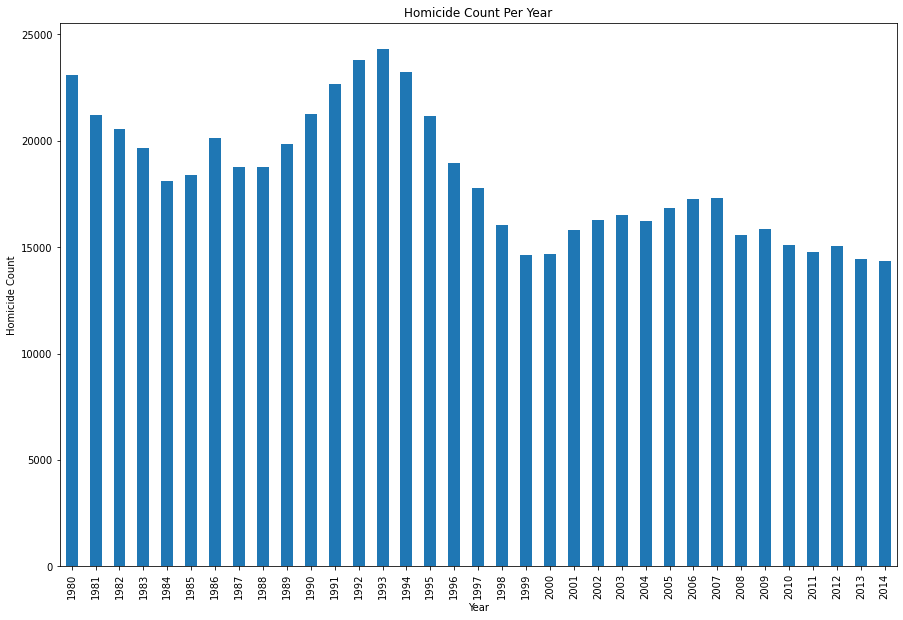

In [60]:
graph_df = homrep_df_copy.groupby('Year')['Year'].count()
graph_df.plot.bar(figsize=(15,10))
plt.xlabel('Year')
plt.ylabel('Homicide Count')
plt.title('Homicide Count Per Year')

In [61]:
test_df = homrep_df_copy[(homrep_df_copy['Year'] >= 1980) & (homrep_df_copy['Year'] <= 1984)]
test_df.groupby('Year')['Year'].count().mean()
#20518.0

test_df.groupby('Year')['Year'].count().std()
#1852.775080790974

1852.775080790974

In [62]:
test_df = homrep_df_copy[(homrep_df_copy['Year'] >= 1984) & (homrep_df_copy['Year'] <= 1989)]
test_df.groupby('Year')['Year'].count().mean()
#19005.666666666668

test_df.groupby('Year')['Year'].count().std()
#814.1782769557701

814.1782769557701

In [63]:
test_df = homrep_df_copy[(homrep_df_copy['Year'] >= 1990) & (homrep_df_copy['Year'] <= 1994)]
test_df.groupby('Year')['Year'].count().mean()
#23055.4

test_df.groupby('Year')['Year'].count().std()
#1188.52946955471

1188.52946955471

In [64]:
test_df = homrep_df_copy[(homrep_df_copy['Year'] >= 1995) & (homrep_df_copy['Year'] <= 1999)]
test_df.groupby('Year')['Year'].count().mean()
#17724.8

test_df.groupby('Year')['Year'].count().std()
#2543.9204390074783

2543.9204390074783

In [65]:
test_df = homrep_df_copy[(homrep_df_copy['Year'] >= 2000) & (homrep_df_copy['Year'] <= 2004)]
test_df.groupby('Year')['Year'].count().mean()
#15897.4

test_df.groupby('Year')['Year'].count().std()
#731.5519803814353

731.5519803814353

In [66]:
test_df = homrep_df_copy[(homrep_df_copy['Year'] >= 2005) & (homrep_df_copy['Year'] <= 2009)]
test_df.groupby('Year')['Year'].count().mean()
#16569.8

test_df.groupby('Year')['Year'].count().std()
#804.4555301568882

804.4555301568882

In [67]:
test_df = homrep_df_copy[(homrep_df_copy['Year'] >= 2010) & (homrep_df_copy['Year'] <= 2014)]
test_df.groupby('Year')['Year'].count().mean()
#14737.2

test_df.groupby('Year')['Year'].count().std()
#348.4009184832899

348.4009184832899

In [68]:
test_df = homrep_df_copy
test_df.groupby('Year')['Year'].count().mean()
#18241.542857142857

test_df.groupby('Year')['Year'].count().std()
#2986.4466525292833

2986.4466525292833

Phase 5: Analyzing the "Crime Type" and "Weapon" Variable against the Total Cases

Steps:
1. Determine the different values for both the Crime Type and the Weapon
2. Determine the total number cases each Crime Type is involved in
3. Plot down the findings into a graph for visualization
4. Repeat steps 2 and 3 for the Weapon

Findings:
<li>An overwhelming number of all homicide cases (98.57%) have been a case of murder or manslaughter, whereas the rest (1.43) have been a manslaughter by negligence </li>
<li>Almost half of all homicide cases (49.72%) have involved a handgun, and almost 2/3 (64.6%) have involved either a gun or a knife</li>

In [69]:
homrep_df_copy['Crime Type'].unique()

array(['Murder or Manslaughter', 'Manslaughter by Negligence'],
      dtype=object)

In [70]:
homrep_df_copy['Weapon'].unique()

array(['Blunt Object', 'Strangulation', 'Unknown', 'Rifle', 'Knife',
       'Firearm', 'Shotgun', 'Fall', 'Handgun', 'Drowning', 'Suffocation',
       'Explosives', 'Fire', 'Drugs', 'Gun', 'Poison'], dtype=object)

In [71]:
test_df = homrep_df_copy.groupby('Crime Type')
test_df['Crime Type'].count()

Crime Type
Manslaughter by Negligence      9116
Murder or Manslaughter        629338
Name: Crime Type, dtype: int64

<AxesSubplot:ylabel='Crime Type'>

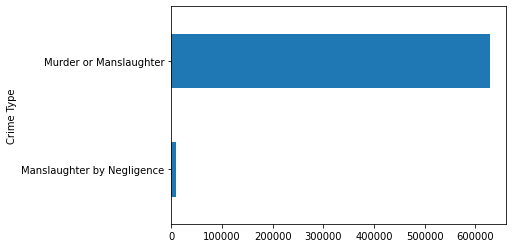

In [72]:
test_df['Crime Type'].count().plot(kind="barh")

In [73]:
test_df = homrep_df_copy.groupby('Weapon')
test_df['Weapon'].count().sort_values(ascending=False)

Weapon
Handgun          317484
Knife             94962
Blunt Object      67337
Firearm           46980
Unknown           33192
Shotgun           30722
Rifle             23347
Strangulation      8110
Fire               6173
Suffocation        3968
Gun                2206
Drugs              1588
Drowning           1204
Explosives          537
Poison              454
Fall                190
Name: Weapon, dtype: int64

<AxesSubplot:ylabel='Weapon'>

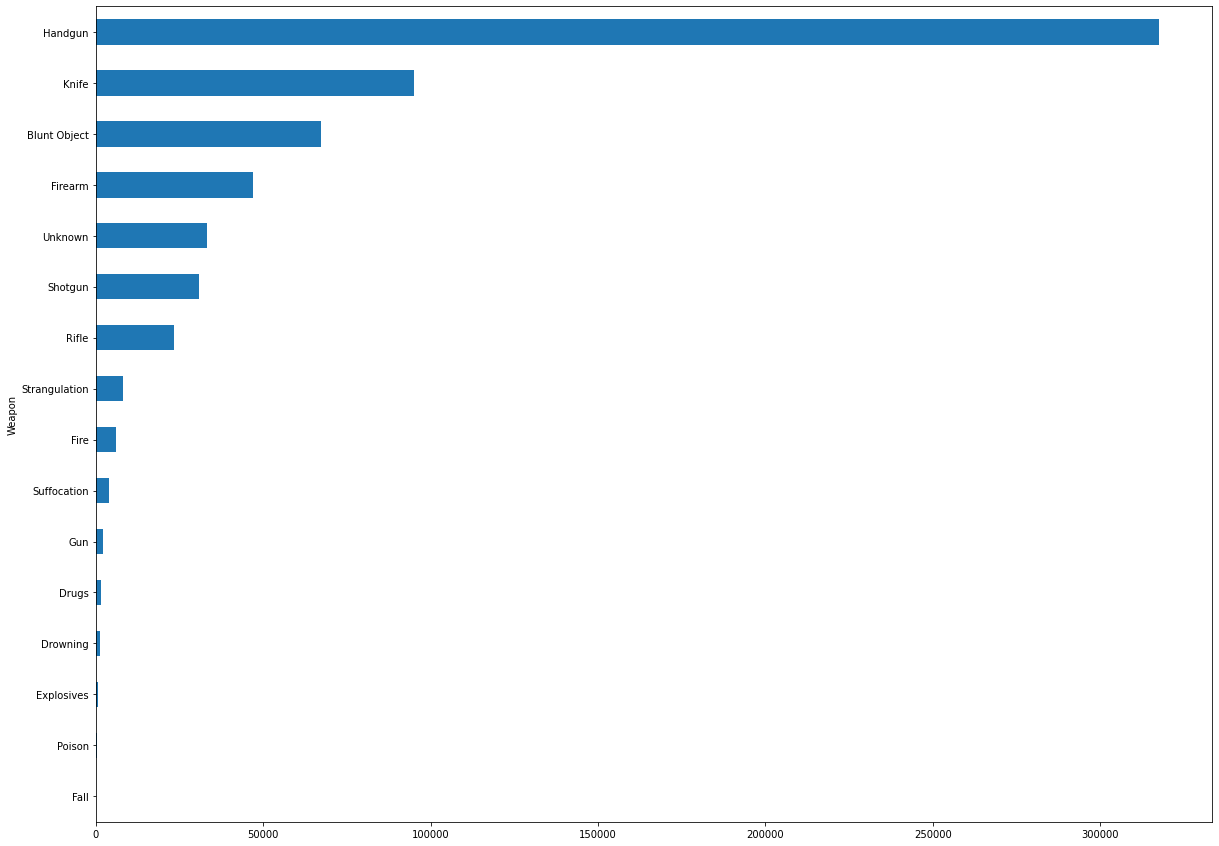

In [74]:
test_df['Weapon'].count().sort_values().plot(kind="barh", figsize=(20,15))

Phase 6: Determining if there is a change in demographics of the perpetrator throughout the years

Steps:
1. Check the fluctuation of homicide cases per Perpetrator Race (including unknown) throughout the years from 1980-2014. This can be done best using a line graph containing all the races.
2. Repeat Step 1 but this time for Perpetrator Ethnicity. The "unknown" variable will have to be included again to likewise achieve a better representation.
3. Determine the fluctuation of the mean age throughout the years from 1980-2014 using a bar graph. To gain more insight, the years will be parsed into groups of 5 years and to determine the number of homicide cases per Perpetrator Age for each Year group. 
4. Check the fluctuation of the Perpetrator Sex. This can be done best using a simple line graph showing both Male and Female changes.

Findings:
<li>The demographics of the homicide cases from 1980-2014 have been almost entirely consistent, with whites, blacks, and unknowns taking up the bulk of the homicide cases (in that order) and asians and amerindians taking up the rest. However, between 1990-1994, there was a sharp increase in homicide cases by Blacks and Unknowns, which makes them mostly responsible for the huge upstick in cases at around this time.</li>
<li>It is also worth mentioning that cases committed by Amerindians have experienced almost 0 growth, and those committed by asians have fluctuated but have remained relatively at the same levels.
<li>At least from what little is known, the number of non-hispanic perpetrators far exceeded that of hispanic ones. However, that number has decreased sharply until 1987, giving it the appearance that the proportion between hispanics and non-hispanics differs only relatively slightly.</li>
<li>The mean age for 1980 started at 30.82, with a slight increase until31.52 by 1984. From that point, however, it steadily declined until it bottomed out at 28.19 in 1994. But from that point, it just kept on increasing until it hit a peak of 32.35 in 2014, higher than what it was at any given point in the 1980s.</li>
<li>The shift in mean age throughout the years, however, may have been because of the rise of cases in peak years, and the decrease of cases in drop years, particularly at ages 18-23</li>
<li>The cases of female perpetrators has been on a steady decline from 1980 to 2014. For male perpetrators, however, the number of cases fluctuates regularly, but generally there was large uptick from 1990-1994, before dropping until 2000, where it remained fluctuatorily at that level until 2014.</li>

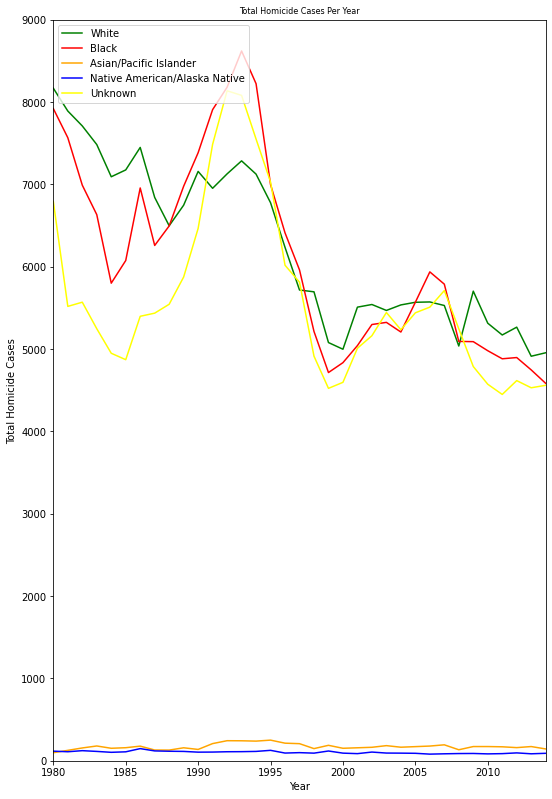

In [75]:
df = homrep_df_copy

fig = plt.figure(figsize = (30,30))

p = fig.add_subplot(231)

c1 = df[df['Perpetrator Race'] == 'White'].groupby('Year').Weapon.count()
plt.plot(c1, color = 'green', label = 'White')
p.set_ylim(0, 9000)
p.set_xlim(1980,2014)

c2 = df[df['Perpetrator Race'] == 'Black'].groupby('Year').Weapon.count()
plt.plot(c2, color = 'red', label = 'Black')
p.set_ylim(0, 9000)
p.set_xlim(1980,2014)

c3 = df[df['Perpetrator Race'] == 'Asian/Pacific Islander'].groupby('Year').Weapon.count()
plt.plot(c3, color = 'orange', label = 'Asian/Pacific Islander')
p.set_ylim(0, 9000)
p.set_xlim(1980,2014)

c4 = df[df['Perpetrator Race'] == 'Native American/Alaska Native'].groupby('Year').Weapon.count()
plt.plot(c4, color = 'blue', label = 'Native American/Alaska Native')
p.set_ylim(0, 9000)
p.set_xlim(1980,2014)

c5 = df[df['Perpetrator Race'] == 'Unknown'].groupby('Year').Weapon.count()
plt.plot(c5, color = 'yellow', label = 'Unknown')
p.set_ylim(0, 9000)
p.set_xlim(1980,2014)

p.set_xlabel('Year')
p.set_ylabel('Total Homicide Cases')
p.set_title('Total Homicide Cases Per Year', fontsize = 8)

p.legend(loc = "upper left")

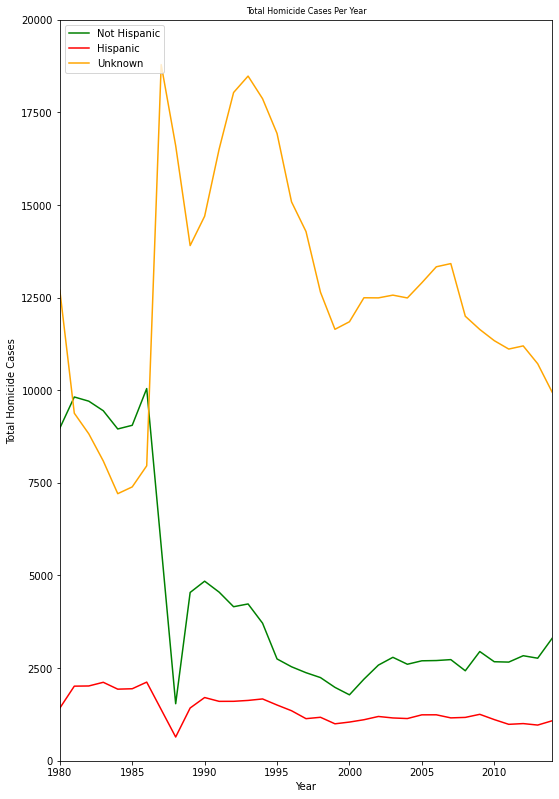

In [76]:
df = homrep_df_copy

fig = plt.figure(figsize = (30,30))

p = fig.add_subplot(231)

c1 = df[df['Perpetrator Ethnicity'] == 'Not Hispanic'].groupby('Year').Weapon.count()
plt.plot(c1, color = 'green', label = 'Not Hispanic')
p.set_ylim(0, 20000)
p.set_xlim(1980,2014)

c2 = df[df['Perpetrator Ethnicity'] == 'Hispanic'].groupby('Year').Weapon.count()
plt.plot(c2, color = 'red', label = 'Hispanic')
p.set_ylim(0, 20000)
p.set_xlim(1980,2014)

c3 = df[df['Perpetrator Ethnicity'] == 'Unknown'].groupby('Year').Weapon.count()
plt.plot(c3, color = 'orange', label = 'Unknown')
p.set_ylim(0, 20000)
p.set_xlim(1980,2014)

p.set_xlabel('Year')
p.set_ylabel('Total Homicide Cases')
p.set_title('Total Homicide Cases Per Year', fontsize = 8)

p.legend(loc = "upper left")

In [77]:
test_df = homrep_df_copy

test_df.groupby('Year')['Perpetrator Age'].mean()

Year
1980    30.823402
1981    31.437901
1982    31.342630
1983    31.285554
1984    31.524623
1985    31.470902
1986    31.054410
1987    31.000160
1988    30.465786
1989    29.639923
1990    29.434152
1991    28.607362
1992    28.853066
1993    28.439942
1994    28.190484
1995    28.653619
1996    29.145184
1997    29.431213
1998    29.670319
1999    30.000068
2000    30.040624
2001    29.975258
2002    30.108065
2003    30.301417
2004    30.696852
2005    30.259622
2006    30.208857
2007    30.281281
2008    30.368259
2009    31.274306
2010    31.532703
2011    31.640282
2012    31.660015
2013    32.131326
2014    32.350778
Name: Perpetrator Age, dtype: float64

<AxesSubplot:xlabel='Year'>

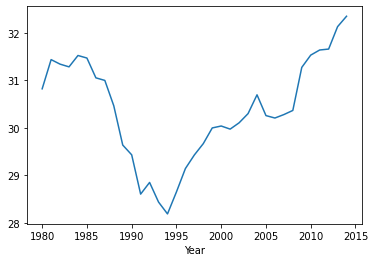

In [78]:
test_df.groupby('Year')['Perpetrator Age'].mean().plot()

In [79]:
test_df = homrep_df_copy[homrep_df_copy['Year'] >= 1980]
test_df = test_df[test_df['Year'] <= 1984]

test_df.groupby('Perpetrator Age')['Perpetrator Age'].count().sort_values(ascending=False).head(20)

Perpetrator Age
25    4740
24    4569
23    4535
22    4399
26    4318
21    4225
27    4224
28    4048
20    4003
30    3886
29    3853
19    3644
32    3313
31    3310
18    3023
33    3008
34    2659
35    2592
36    2349
17    2265
Name: Perpetrator Age, dtype: int64

In [80]:
test_df = homrep_df_copy[homrep_df_copy['Year'] >= 1985]
test_df = test_df[test_df['Year'] <= 1989]

test_df.groupby('Perpetrator Age')['Perpetrator Age'].count().sort_values(ascending=False).head(20)

Perpetrator Age
25    4417
23    4123
22    4104
20    4103
24    4097
26    3976
21    3875
27    3801
28    3742
30    3724
19    3605
29    3509
18    3117
31    3026
32    2911
33    2691
35    2544
34    2493
17    2476
36    2065
Name: Perpetrator Age, dtype: int64

In [81]:
test_df = homrep_df_copy[homrep_df_copy['Year'] >= 1990]
test_df = test_df[test_df['Year'] <= 1994]

test_df.groupby('Perpetrator Age')['Perpetrator Age'].count().sort_values(ascending=False).head(20)

Perpetrator Age
20    6218
19    6066
18    5920
21    5592
22    5419
23    5119
25    5041
24    4833
17    4796
26    4371
27    4141
28    4070
30    3899
29    3817
31    3229
16    3213
32    3122
33    2834
35    2689
34    2655
Name: Perpetrator Age, dtype: int64

In [82]:
test_df = homrep_df_copy[homrep_df_copy['Year'] >= 1995]
test_df = test_df[test_df['Year'] <= 1999]

test_df.groupby('Perpetrator Age')['Perpetrator Age'].count().sort_values(ascending=False).head(20)

Perpetrator Age
20    5052
19    4967
18    4448
21    4432
22    4216
23    3863
24    3624
25    3574
17    3271
26    3156
27    3117
28    2876
30    2746
29    2637
31    2437
32    2339
33    2136
16    2114
34    2087
35    2022
Name: Perpetrator Age, dtype: int64

In [83]:
test_df = homrep_df_copy[homrep_df_copy['Year'] >= 2000]
test_df = test_df[test_df['Year'] <= 2004]

test_df.groupby('Perpetrator Age')['Perpetrator Age'].count().sort_values(ascending=False).head(20)

Perpetrator Age
20    4466
21    4157
22    4009
23    3838
19    3756
25    3584
24    3451
26    3201
18    3078
27    2880
28    2697
30    2640
29    2521
31    2177
32    2127
33    1913
17    1911
35    1821
34    1799
36    1607
Name: Perpetrator Age, dtype: int64

In [84]:
test_df = homrep_df_copy[homrep_df_copy['Year'] >= 2005]
test_df = test_df[test_df['Year'] <= 2009]

test_df.groupby('Perpetrator Age')['Perpetrator Age'].count().sort_values(ascending=False).head(20)

Perpetrator Age
20    4456
21    4000
19    3972
22    3924
25    3836
23    3801
24    3629
18    3575
26    3235
27    3114
28    2911
30    2600
29    2528
17    2237
31    2181
32    2124
33    1931
35    1908
34    1884
36    1762
Name: Perpetrator Age, dtype: int64

In [85]:
test_df = homrep_df_copy[homrep_df_copy['Year'] >= 2010]
test_df = test_df[test_df['Year'] <= 2014]

test_df.groupby('Perpetrator Age')['Perpetrator Age'].count().sort_values(ascending=False).head(20)

Perpetrator Age
20    3381
21    3372
22    3307
23    3226
24    3078
25    3073
19    2961
26    2851
27    2685
29    2534
28    2527
18    2517
30    2501
31    2247
32    2148
33    1880
34    1832
35    1824
36    1502
17    1455
Name: Perpetrator Age, dtype: int64

<AxesSubplot:xlabel='Year'>

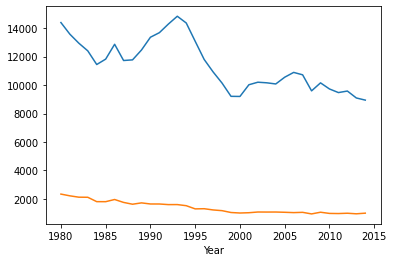

In [86]:
test_df = homrep_df_copy[homrep_df_copy['Perpetrator Sex'] == 'Male']
test_df.groupby('Year').count().Weapon.plot()

test_df = homrep_df_copy[homrep_df_copy['Perpetrator Sex'] == 'Female']
test_df.groupby('Year').count().Weapon.plot()

In [87]:
homrep_df_copy['Crime Solved'].unique()

array(['Yes', 'No'], dtype=object)

In [88]:
homrep_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

Phase 7: Determining the state of the homicide (Crime Type, Crime Solved, Relationship Between Perpetrator and Victim, and Weapon) per State and City

Steps:
1. Check the counts of each Crime Type, first by City, and then by State. Because there are only two variables, it should also be wise to determine the proportions of each one.
2. Determine the proportions of Crimes successfully solved, first by City, and then by State.
3. Check the counts of each Relationship, first by City, and then by State.
4. Repeat Step 4 but for the Weapon. In addition, it would be wise to determine the proportion of the Weapon with the highest use (Handgun) to gain a better understanding.

Findings:
<li>Upon checking the cases per state where the Crime Type is a Murder or Manslaughter, the states with the highest cases are an exact replica as the those in total regardless of crime type, with only slightly less cases overall. This makes sense given the meager amounts of homicide cases by Manslaughter by Negligence. The same, however, cannot be said for cases by Manslaughter by Negligence, with many new cities (albeit from the same states) dominating the spot.</li>
<li>The mean rate per state at which the homicide cases have been solved is 77.66%, with a standard deviation of 9.83%. The median rate stands at 79.37%. The state with the highest homicide solution rate is North Dakota at 93.18%, while the lowest is New York at 54.1%</li>
<li>It is also worth mentioning that the states with the highest cases tend to have the lowest success rates, or at least lower than average</li>
<li>Unfortunetely, the relationship of the perpetrator and victim, with respect to either the city or the state, are unknown, so no interesting conclusion can be drawn from it</li>
<li>In nearly every single state, Handguns dominate the type of weapon used in the Homicide. Upon closer inspection of this, there are 12 states where there are more cases involving handguns than any other weapon combined.</li>

In [89]:
test_df = homrep_df_copy

test_df[test_df['Crime Type'] == 'Murder or Manslaughter'].groupby(['State', 'City']).Weapon.count().sort_values(ascending=False).head(50)

State                 City                
California            Los Angeles             44331
New York              New York                38423
Illinois              Cook                    22049
Michigan              Wayne                   19016
Texas                 Harris                  16003
Pennsylvania          Philadelphia            12820
Texas                 Dallas                  11105
Maryland              Baltimore city           9325
Florida               Dade                     8744
Arizona               Maricopa                 8338
Louisiana             Orleans                  7819
District of Columbia  District of Columbia     7110
Georgia               Fulton                   6349
Missouri              St. Louis city           5910
California            San Bernardino           5656
Tennessee             Shelby                   5568
California            Alameda                  5504
                      San Diego                5414
Texas                

In [90]:
test_df = homrep_df_copy

test_df[test_df['Crime Type'] == 'Manslaughter by Negligence'].groupby(['State', 'City']).Weapon.count().sort_values(ascending=False).head(50)

State           City            
Florida         Dade                310
Texas           Harris              297
Illinois        Cook                289
Arizona         Maricopa            244
California      Los Angeles         180
Florida         Duval               146
Texas           Bexar               144
Florida         Palm Beach          140
                Hillsborough        134
                Broward             118
                Orange              102
                Pinellas             98
Alaska          Juneau               69
Oklahoma        Oklahoma             68
Louisiana       East Baton Rouge     68
Missouri        St. Louis            65
Nevada          Clark                65
Ohio            Cuyahoga             62
California      San Bernardino       61
Florida         Lee                  60
Oklahoma        Tulsa                53
Arizona         Pima                 52
North Carolina  Mecklenburg          49
California      Alameda              47
Tenness

In [91]:
test_df = homrep_df_copy

test_num = test_df[test_df['Crime Type'] == 'Murder or Manslaughter'].groupby(['State', 'City']).Weapon.count()
test_den = test_df.groupby(['State', 'City']).Weapon.count()

test_quo = test_num / test_den
test_quo.sort_values(ascending=True).head(50)

State          City             
Wisconsin      Pepin                0.333333
Nebraska       Hitchcock            0.333333
Missouri       Gasconade            0.333333
Minnesota      Grant                0.500000
South Dakota   Butte                0.500000
Illinois       Fayette              0.500000
Utah           Juab                 0.500000
Montana        Powell               0.500000
Texas          Lipscomb             0.500000
Montana        Sweet Grass          0.500000
Oklahoma       Harper               0.500000
               Grant                0.500000
               Ellis                0.500000
Colorado       Grand                0.583333
Oklahoma       Major                0.600000
Wisconsin      Buffalo              0.600000
Minnesota      Pennington           0.600000
Ohio           Morrow               0.619048
Alaska         Aleutians West       0.625000
Mississippi    Pontotoc             0.666667
Kansas         Elk                  0.666667
South Dakota   Day    

In [92]:
test_df = homrep_df_copy

test_num = test_df[test_df['Crime Solved'] == 'Yes'].groupby(['State', 'City']).Weapon.count()
test_den = test_df.groupby(['State', 'City']).Weapon.count()

test_quo = test_num / test_den
test_quo.sort_values(ascending=True).head(50)

State                 City                
Texas                 Sherman                 0.250000
Mississippi           Amite                   0.250000
New York              Queens                  0.333333
Texas                 Kenedy                  0.333333
Idaho                 Clark                   0.333333
Kansas                Wabaunsee               0.333333
Nevada                Esmeralda               0.333333
Kentucky              Menifee                 0.333333
Kansas                Morton                  0.333333
Illinois              Effingham               0.333333
Virginia              Repressed               0.333333
District of Columbia  District of Columbia    0.343078
Kansas                Stanton                 0.400000
Kentucky              Todd                    0.400000
Ohio                  Auglaize                0.428571
Massachusetts         Suffolk                 0.436962
Idaho                 Oneida                  0.444444
Missouri              

In [93]:
test_quo[test_quo == 1.0].sort_values(ascending=True).count() / test_quo.sort_values(ascending=True).count()

0.21825396825396826

In [94]:
test_df = homrep_df_copy

test_num = test_df[test_df['Crime Solved'] == 'Yes'].groupby('State').Weapon.count()
test_den = test_df.groupby(['State']).Weapon.count()

test_quo = test_num / test_den
test_quo.sort_values(ascending=False).head(50)

State
North Dakota      0.931818
Montana           0.926789
South Dakota      0.918552
South Carolina    0.907677
Idaho             0.904348
Wyoming           0.903175
West Virginia     0.896112
Maine             0.894131
Vermont           0.883495
Iowa              0.871355
Utah              0.859813
Tennessee         0.841326
Arkansas          0.840939
Mississippi       0.840361
New Hampshire     0.835115
Nebraska          0.833959
Wisconsin         0.830884
Oklahoma          0.830855
Minnesota         0.824654
Oregon            0.824283
Alaska            0.816327
Kansas            0.806159
Delaware          0.802375
North Carolina    0.802060
Colorado          0.798423
Alabama           0.789030
Virginia          0.787178
Hawaii            0.783259
Washington        0.782086
Kentucky          0.767623
Texas             0.763588
Pennsylvania      0.760274
New Mexico        0.739700
Georgia           0.722686
Arizona           0.716961
Ohio              0.716620
Florida           0.71

In [95]:
test_quo.mean()

0.7681459526654891

In [96]:
test_quo.std()

0.11473117001832335

In [97]:
test_df = homrep_df_copy
test_df.groupby(['State', 'City', 'Relationship']).Weapon.count().sort_values(ascending=False).head(50)

State                 City                  Relationship
New York              New York              Unknown         25863
California            Los Angeles           Unknown         22049
Illinois              Cook                  Unknown         12197
California            Los Angeles           Stranger        11753
Michigan              Wayne                 Unknown         10220
Florida               Dade                  Unknown          6773
Texas                 Dallas                Unknown          6418
Pennsylvania          Philadelphia          Unknown          6375
Maryland              Baltimore city        Unknown          5833
District of Columbia  District of Columbia  Unknown          5483
New York              New York              Stranger         5036
Michigan              Wayne                 Acquaintance     4944
Louisiana             Orleans               Unknown          4787
Texas                 Harris                Stranger         4570
                   

In [98]:
test_df = homrep_df_copy
test_df.groupby(['State', 'Relationship']).Weapon.count().sort_values(ascending=False).head(50)

State                 Relationship
California            Unknown         45050
New York              Unknown         30084
Florida               Unknown         26257
California            Stranger        23827
Texas                 Unknown         21388
                      Acquaintance    14912
Michigan              Unknown         13657
Illinois              Unknown         13496
Texas                 Stranger        10739
Pennsylvania          Unknown         10635
California            Acquaintance     9597
Maryland              Unknown          9313
Louisiana             Unknown          7859
Ohio                  Unknown          7557
Missouri              Unknown          7124
Georgia               Unknown          6922
Michigan              Acquaintance     6915
North Carolina        Unknown          6790
New York              Stranger         6494
Georgia               Acquaintance     6207
New Jersey            Unknown          5979
California            Friend           59

In [99]:
test_df = homrep_df_copy

test_num = test_df[test_df['Relationship'] == 'Acquaintance'].groupby('State').Weapon.count()
test_den.sort_values(ascending=False)

State
California              99783
Texas                   62095
New York                49268
Florida                 37164
Michigan                28448
Illinois                25871
Pennsylvania            24236
Georgia                 21088
North Carolina          20390
Louisiana               19629
Ohio                    19158
Maryland                17312
Virginia                15520
Tennessee               14930
Missouri                14832
New Jersey              14132
Arizona                 12871
South Carolina          11698
Indiana                 11463
Alabama                 11376
Oklahoma                 8809
Washington               7815
District of Columbia     7115
Arkansas                 6947
Colorado                 6593
Kentucky                 6554
Mississippi              6546
Wisconsin                6191
Massachusetts            6036
Nevada                   5553
Connecticut              4896
New Mexico               4272
Oregon                   4217
Minn

In [100]:
test_df = homrep_df_copy
test_df.groupby(['State', 'City', 'Weapon']).Weapon.count().sort_values(ascending=False).head(50)

State                 City                  Weapon      
California            Los Angeles           Handgun         28018
New York              New York              Handgun         22995
Illinois              Cook                  Handgun         13855
Texas                 Harris                Handgun          9637
Pennsylvania          Philadelphia          Handgun          8859
Michigan              Wayne                 Handgun          8453
New York              New York              Knife            6915
Maryland              Baltimore city        Handgun          6679
Louisiana             Orleans               Handgun          5720
California            Los Angeles           Knife            5705
Texas                 Dallas                Handgun          5701
Arizona               Maricopa              Handgun          4816
Georgia               Fulton                Handgun          4074
New York              New York              Blunt Object     4058
District of Columbi

In [101]:
test_df = homrep_df_copy
test_df.groupby(['State', 'Weapon']).Weapon.count().sort_values(ascending=False).head(50)

State                 Weapon      
California            Handgun         55429
Texas                 Handgun         29843
New York              Handgun         26452
Illinois              Handgun         15492
California            Knife           14989
Florida               Handgun         14213
Pennsylvania          Handgun         13302
Louisiana             Handgun         12266
Georgia               Handgun         11900
Michigan              Handgun         11657
Maryland              Handgun         10906
California            Blunt Object    10195
Texas                 Knife            9656
New York              Knife            9347
North Carolina        Handgun          9217
Ohio                  Handgun          9204
Tennessee             Handgun          7255
Florida               Firearm          7105
Virginia              Handgun          7101
Arizona               Handgun          7054
New Jersey            Handgun          6790
Alabama               Handgun          63

In [102]:
test_df = homrep_df_copy

test_num = test_df[test_df['Weapon'] == 'Handgun'].groupby('State').Weapon.count()
test_den = test_df.groupby(['State']).Weapon.count()

test_quo = test_num / test_den
test_quo.sort_values(ascending=False).head(50)

State
Maryland                0.629968
Louisiana               0.624892
Illinois                0.598817
Georgia                 0.564302
Mississippi             0.562786
Alabama                 0.558368
California              0.555495
Pennsylvania            0.548853
Arizona                 0.548054
District of Columbia    0.541532
New York                0.536900
Indiana                 0.526564
Kentucky                0.498779
Tennessee               0.485934
Texas                   0.480602
New Jersey              0.480470
Ohio                    0.480426
Connecticut             0.476307
Oklahoma                0.473152
South Carolina          0.471448
Arkansas                0.457752
Virginia                0.457539
Nevada                  0.454709
North Carolina          0.452035
Wisconsin               0.440963
Washington              0.426232
New Mexico              0.418305
Colorado                0.410284
Michigan                0.409765
Minnesota               0.409560
Nebr

In [103]:
test_quo.sort_values(ascending=False).head(50).mean()

0.432895871084518

Phase 8: Analyzing the Agency Type against the Year, State, and City variables 

Steps: 
1. Determine the count of homicide cases per Agency for each year from 1980-2014. This will be done first by an individual count per year for a bit more analysis, then it will be visualized using a graph to compare againt the other agencies overtime.
2. Determine the count of homicide cases per Agent for each State. In addition to this, the same set of conditions will be checked per year for more analysis.
3. Repeat Step 2 but for each City.

Findings:
<li>Throughout the years, the agencies have decreased overtime in a fluctuatory manner. However, the one that has the most impact would be the Municipal Police, as these agencies have the highest reported homicide cases overall as well as the one that fluctuates by the highest intervals. </li>
<li>It is worth mentioning that the shape of the Municipal Police cases bears a striking similarity to the homicide cases of blacks per year, as well as that of males per year.</li>
<li>As expected, the highest homicide recordings per state tend to be dominated by the municipal police of each state, and as such, the least homicide recordingsare dominated mostly by the regional police or the special police of each state, even most states with the highest homicide case recordings</li>
<li>When examining the number of homicide cases with respect to the Year and State,the highest 60 homicide recorded are all by Municipal Police. In addition to this, these casesare dominated by that of the California Municipal Police (followed by that of New York, then Texas) <li>
<li>When examining the number of homicide cases with respect to the Year and City,the highest 60 homicide recorded are all by Municipal Police. However unlike with that of the States, wherethe top spots were most dominated by California, here it is split between the city of New York (New York) and Los Angeles (California), with the top 5 spots all taken by the former</li>

In [104]:
test_df = homrep_df_copy[homrep_df_copy['Year'] >= 1980]
test_df = test_df[test_df['Year'] <= 1988]

test_df.groupby(['Year','Agency Type']).Weapon.count().head(60)

Year  Agency Type     
1980  County Police         652
      Municipal Police    17636
      Regional Police        10
      Sheriff              3946
      Special Police         91
      State Police          757
1981  County Police         655
      Municipal Police    16196
      Regional Police         8
      Sheriff              3667
      Special Police         87
      State Police          595
1982  County Police         679
      Municipal Police    15471
      Regional Police        12
      Sheriff              3736
      Special Police         80
      State Police          564
      Tribal Police           2
1983  County Police         580
      Municipal Police    15174
      Regional Police         7
      Sheriff              3295
      Special Police         65
      State Police          531
      Tribal Police           1
1984  County Police         528
      Municipal Police    13661
      Regional Police         8
      Sheriff              3329
      Special Pol

In [105]:
test_df = homrep_df_copy[homrep_df_copy['Year'] >= 1989]
test_df = test_df[test_df['Year'] <= 1996]

test_df.groupby(['Year','Agency Type']).Weapon.count().head(60)

Year  Agency Type     
1989  County Police         505
      Municipal Police    15849
      Regional Police         5
      Sheriff              2944
      Special Police         70
      State Police          495
1990  County Police         548
      Municipal Police    16973
      Regional Police         7
      Sheriff              3147
      Special Police         98
      State Police          473
1991  County Police         601
      Municipal Police    18383
      Regional Police         8
      Sheriff              3105
      Special Police         91
      State Police          469
1992  County Police         756
      Municipal Police    19037
      Regional Police         6
      Sheriff              3456
      Special Police         95
      State Police          442
      Tribal Police           1
1993  County Police         858
      Municipal Police    19489
      Regional Police         3
      Sheriff              3446
      Special Police         95
      State Polic

In [106]:
test_df = homrep_df_copy[homrep_df_copy['Year'] >= 1997]
test_df = test_df[test_df['Year'] <= 2003]

test_df.groupby(['Year','Agency Type']).Weapon.count().head(60)

Year  Agency Type     
1997  County Police         692
      Municipal Police    13802
      Regional Police         2
      Sheriff              2920
      Special Police         30
      State Police          348
1998  County Police         653
      Municipal Police    12221
      Regional Police         3
      Sheriff              2741
      Special Police         50
      State Police          393
1999  County Police         584
      Municipal Police    11184
      Regional Police         4
      Sheriff              2456
      Special Police         65
      State Police          323
      Tribal Police           5
2000  County Police         526
      Municipal Police    11384
      Regional Police         3
      Sheriff              2436
      Special Police         62
      State Police          258
      Tribal Police           2
2001  County Police         685
      Municipal Police    12187
      Regional Police         5
      Sheriff              2591
      Special Pol

In [107]:
test_df = homrep_df_copy[homrep_df_copy['Year'] >= 2004]
test_df = test_df[test_df['Year'] <= 2010]

test_df.groupby(['Year','Agency Type']).Weapon.count().head(60)

Year  Agency Type     
2004  County Police         706
      Municipal Police    12281
      Regional Police         5
      Sheriff              2748
      Special Police        112
      State Police          379
      Tribal Police           2
2005  County Police         776
      Municipal Police    12929
      Regional Police         4
      Sheriff              2685
      Special Police        111
      State Police          331
2006  County Police         812
      Municipal Police    13181
      Regional Police        10
      Sheriff              2827
      Special Police        115
      State Police          328
      Tribal Police           2
2007  County Police         795
      Municipal Police    13220
      Regional Police        12
      Sheriff              2787
      Special Police        103
      State Police          385
      Tribal Police           1
2008  County Police         750
      Municipal Police    11680
      Regional Police        11
      Sheriff    

In [108]:
test_df = homrep_df_copy[homrep_df_copy['Year'] >= 2011]
test_df = test_df[test_df['Year'] <= 2014]

test_df.groupby(['Year','Agency Type']).Weapon.count().head(60)

Year  Agency Type     
2011  County Police         666
      Municipal Police    11086
      Regional Police         7
      Sheriff              2546
      Special Police         91
      State Police          358
      Tribal Police           2
2012  County Police         499
      Municipal Police    11530
      Regional Police         9
      Sheriff              2547
      Special Police         34
      State Police          410
      Tribal Police           4
2013  County Police         464
      Municipal Police    10937
      Regional Police        13
      Sheriff              2613
      Special Police         37
      State Police          380
      Tribal Police           1
2014  County Police         475
      Municipal Police    10943
      Regional Police         3
      Sheriff              2533
      Special Police         28
      State Police          346
      Tribal Police           3
Name: Weapon, dtype: int64

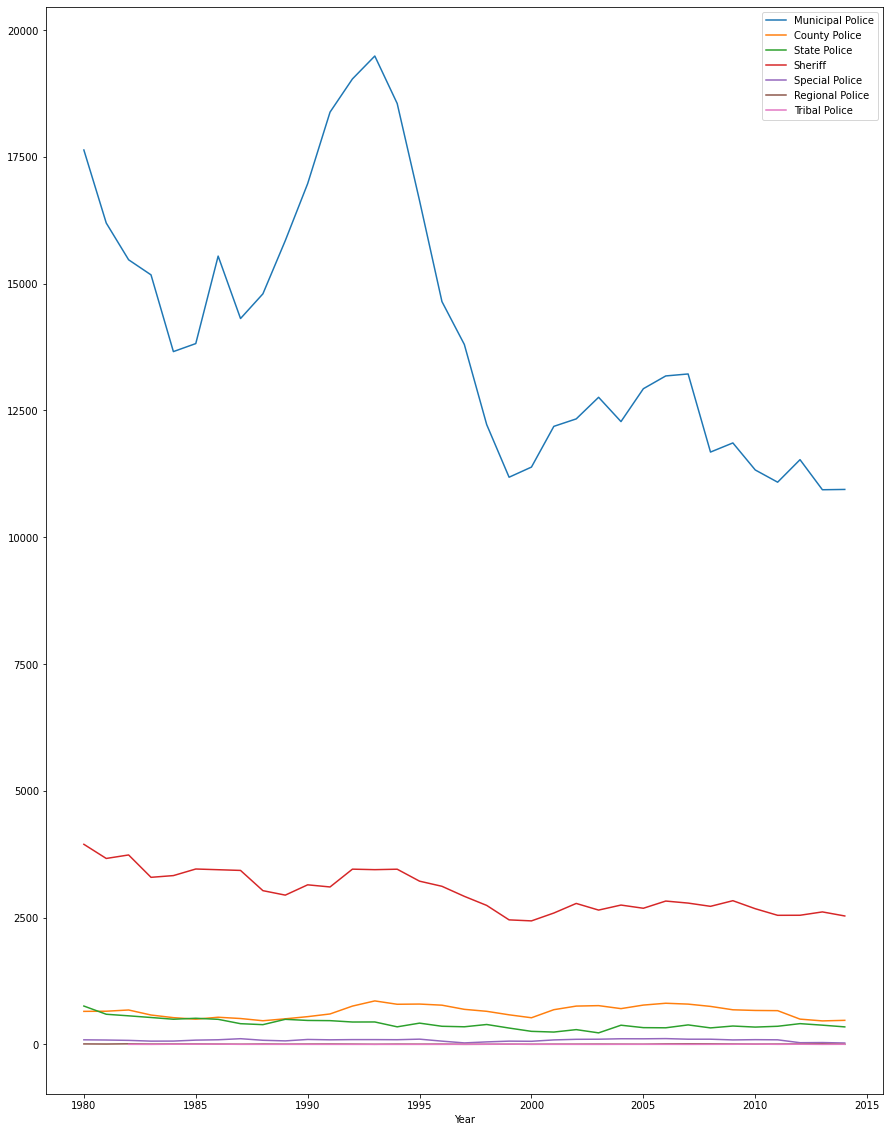

In [109]:
ax = plt.subplots()
f_size = (15,20)

test_df = homrep_df_copy[homrep_df_copy['Agency Type'] == 'Municipal Police']
test_df.groupby('Year').count().Weapon.plot(label = 'Municipal Police', figsize = f_size)

test_df = homrep_df_copy[homrep_df_copy['Agency Type'] == 'County Police']
test_df.groupby('Year').count().Weapon.plot(label = 'County Police', figsize = f_size)

test_df = homrep_df_copy[homrep_df_copy['Agency Type'] == 'State Police']
test_df.groupby('Year').count().Weapon.plot(label = 'State Police', figsize = f_size)

test_df = homrep_df_copy[homrep_df_copy['Agency Type'] == 'Sheriff']
test_df.groupby('Year').count().Weapon.plot(label = 'Sheriff', figsize = f_size)

test_df = homrep_df_copy[homrep_df_copy['Agency Type'] == 'Special Police']
test_df.groupby('Year').count().Weapon.plot(label = 'Special Police', figsize = f_size)

test_df = homrep_df_copy[homrep_df_copy['Agency Type'] == 'Regional Police']
test_df.groupby('Year').count().Weapon.plot(label = 'Regional Police', figsize = f_size)

test_df = homrep_df_copy[homrep_df_copy['Agency Type'] == 'Tribal Police']
test_df.groupby('Year').count().Weapon.plot(label = 'Tribal Police', figsize = f_size)

plt.legend(loc='upper right')
plt.show()

In [110]:
test_df = homrep_df_copy
test_df.groupby(['State','Agency Type']).Weapon.count().sort_values(ascending=False).head(60)

State                 Agency Type     
California            Municipal Police    79787
Texas                 Municipal Police    50231
New York              Municipal Police    45837
Michigan              Municipal Police    25675
Illinois              Municipal Police    25147
Florida               Municipal Police    21417
Pennsylvania          Municipal Police    21233
California            Sheriff             19494
Ohio                  Municipal Police    15714
Louisiana             Municipal Police    14218
New Jersey            Municipal Police    13787
Missouri              Municipal Police    12664
Georgia               Municipal Police    12639
North Carolina        Municipal Police    12354
Tennessee             Municipal Police    12000
Texas                 Sheriff             11819
Florida               Sheriff             11286
Arizona               Municipal Police    10496
Maryland              Municipal Police    10198
Virginia              Municipal Police     9921
I

In [111]:
test_df = homrep_df_copy
test_df.groupby(['State','Agency Type']).Weapon.count().sort_values(ascending=False).tail(60)

State                 Agency Type    
Virginia              Special Police     28
Pennsylvania          Sheriff            27
Illinois              State Police       23
Idaho                 State Police       22
Massachusetts         State Police       22
California            State Police       20
North Carolina        Special Police     20
Kansas                State Police       18
Massachusetts         Regional Police    17
Florida               Tribal Police      17
Washington            Tribal Police      14
Utah                  State Police       14
Idaho                 Special Police     13
Indiana               Special Police     12
Wisconsin             Tribal Police      11
Louisiana             Special Police     11
Michigan              Special Police     11
New Mexico            Tribal Police      10
Washington            Special Police     10
Arizona               Special Police     10
Alabama               Special Police      9
Utah                  Special Police  

In [112]:
test_df = homrep_df_copy
test_df.groupby(['Year','State','Agency Type']).Weapon.count().sort_values(ascending=False).head(60)

Year  State       Agency Type     
1993  California  Municipal Police    3547
1992  California  Municipal Police    3434
1991  California  Municipal Police    3372
1994  California  Municipal Police    3185
1990  California  Municipal Police    3103
1995  California  Municipal Police    3012
1980  California  Municipal Police    2808
1989  California  Municipal Police    2785
1986  California  Municipal Police    2541
1996  California  Municipal Police    2507
1988  California  Municipal Police    2474
1987  California  Municipal Police    2437
1993  New York    Municipal Police    2372
1991  Texas       Municipal Police    2363
1992  New York    Municipal Police    2333
1982  California  Municipal Police    2328
1991  New York    Municipal Police    2291
1985  California  Municipal Police    2289
1983  California  Municipal Police    2244
1981  California  Municipal Police    2238
1997  California  Municipal Police    2236
1984  California  Municipal Police    2204
1990  New York    M

In [113]:
test_df = homrep_df_copy
test_df.groupby(['Year','State','Agency Type']).Weapon.count().sort_values(ascending=False).tail(60)

Year  State           Agency Type    
1997  Michigan        Special Police     1
1987  New Mexico      County Police      1
2012  Maryland        Special Police     1
1988  New York        Special Police     1
      North Carolina  Special Police     1
2009  North Carolina  Special Police     1
1997  Virginia        Special Police     1
2012  Louisiana       Special Police     1
1988  Oklahoma        Special Police     1
1997  South Dakota    Sheriff            1
      Pennsylvania    Special Police     1
2009  Pennsylvania    Sheriff            1
1997  Pennsylvania    Regional Police    1
      Oregon          State Police       1
2012  Kansas          County Police      1
1988  Tennessee       Special Police     1
      Texas           Special Police     1
2009  Rhodes Island   State Police       1
1988  Virginia        Special Police     1
1997  Ohio            Special Police     1
      North Carolina  State Police       1
      New York        Special Police     1
1989  Georgia   

In [114]:
test_df = homrep_df_copy
test_df.groupby(['City','State','Agency Type']).Weapon.count().sort_values(ascending=False).head(60)

City                  State                 Agency Type     
Los Angeles           California            Municipal Police    38907
New York              New York              Municipal Police    38416
Cook                  Illinois              Municipal Police    22259
Wayne                 Michigan              Municipal Police    18904
Harris                Texas                 Municipal Police    13632
Philadelphia          Pennsylvania          Municipal Police    12848
Dallas                Texas                 Municipal Police    11062
Baltimore city        Maryland              Municipal Police     9331
Orleans               Louisiana             Municipal Police     7846
Maricopa              Arizona               Municipal Police     7844
District of Columbia  District of Columbia  Municipal Police     7108
St. Louis city        Missouri              Municipal Police     5955
Fulton                Georgia               Municipal Police     5952
Los Angeles           Califor

In [115]:
test_df = homrep_df_copy
test_df.groupby(['Year','City','State','Agency Type']).Weapon.count().sort_values(ascending=False).head(60)

Year  City         State       Agency Type     
1992  New York     New York    Municipal Police    2089
1991  New York     New York    Municipal Police    2081
1993  New York     New York    Municipal Police    2064
1990  New York     New York    Municipal Police    1935
1988  New York     New York    Municipal Police    1839
1992  Los Angeles  California  Municipal Police    1808
1993  Los Angeles  California  Municipal Police    1801
1980  New York     New York    Municipal Police    1801
1983  New York     New York    Municipal Police    1758
1991  Los Angeles  California  Municipal Police    1746
1990  Los Angeles  California  Municipal Police    1666
1982  New York     New York    Municipal Police    1661
1994  New York     New York    Municipal Police    1655
1989  New York     New York    Municipal Police    1645
1980  Los Angeles  California  Municipal Police    1602
1987  New York     New York    Municipal Police    1601
1981  New York     New York    Municipal Police    1571


Interesting Exploratory Data Analysis Questions Identified:
1. Is there reason to believe that the number of Homicide cases have been increasing since 1980?
2. Are there states that are experience more Homicide Cases than others? What about whether some states are successful or not? 
3. Is there a certain type of Perpetrator Age Group that generates the most homicide cases? If there is, has it changed throughout the years?

1. Is there reason to believe that the number of Homicide cases have been increasing since 1980?

When analyzing the total homicide cases per year from 1980-2014, as well as getting the mean and std homocide count for every 5 years, we can say that not only is there no reason to believe that homicide cases have been on the rise, but we can even say that there is reason to believe that homicide cases have actually been decreasing over these years. We can say this because, while the count has been fluctuatory over the years, it is visually seen going in a downturn over the years, especially when looking at the graph, sorting the year by total homicide cases, and checking the mean of the cases of every group of 5 years 

The following Phases were used to answer this question: <br>
Phase 4

2. Are there states that are experience more Homicide Cases than others? What about whether some states are more successful than others are solving cases? 

After getting the count of homicide cases per state (as well as city), and also checking it against certain factors such as Crime Type, Crime Solution Rate, Relationship, and Weapon, there are always certain countries that always come out on top. These countries include California, Texas, New York, Florida, Michigan, and Illinois, which combined make up a very significant proportion of the total homicide cases accross the United States. Judging from this, then the answer is Yes, there are some states that experience more Homicide Cases than others. For whether or not some states are more successful than others in solving cases, with a mean of 76.81% and a especially with an std of 11.47%, there are indeed some who are more successful than others when it comes to solving cases, as some states hae solved as much as 90% of their total homicide cases, while others (some of which are the same ones with the highest homicide cases) fall below the mean to a low 54.1%. 

The following Phases were used to answer this question: <br>
Phase 1 <br>
Phase 7

3. Is there a certain type of Perpetrator Age Group that generates the most homicide cases? If there is, has it changed throughout the years?

From checking the total homicide cases per Perpetrator Age (in line with the Race, Sex, and Ethnicity of the Perpetrator). It seems that the majority of the ages of the Perpetrator lie around the ages 18-29, or those from their early adolesence up to their late 20s. This is evident from the simple count of each Perpetrator Age sorted by total homicide cases, as well as a Histogram conforming such an age group. Also, upon checking the mean age per year, as well as checking the homocide case counts for every 5 years, it seems like that age group has remaines relatively unchanged throughout the years (although the highest count of perpetrators have become slightly younger overtime). 

The following Phases were used to answer this question: <br>
Phase 2 <br>
Phase 6

## Research Questions 

After performing the Exploratory Data Analysis and Data Visualization, we came up with research questions that we derived from performing the Exploratory Data Analysis. To answer the research questions, we will be performing `Statistical Inference for Means` and `Statistical Inference for Categorical Data` to arrive at a reliable conclusion. 

## Research Question 1:

**QUESTION:** Is there a significant difference on the victim age of homicide cases caused by men and women perpetrators?

**COLUMNS TO BE USED:** `Perpetrator Sex ` - Sex of the perpetrator
                        `Victim Age ` - Age of the victim

For this research question, we will be using `Statistical Inference for Means`


We will be using the sample data from the dataset of Homicide Reports from 1980 - 2014. 

We set up our hypotheses as follows:

**$H_0$  (null hypothesis):** There is no significant difference on the victim age of homicide cases caused by men and women perpetrators

**$H_A$  (alternative hypothesis):**  There is a significant difference on the victim age of homicide cases caused by men and women perpetrators


Now let's look at the summary statistics across the two groups, disregarding the "Unknown" field since that corresponds to Homicide Reports that are unsolved.

In [116]:
summary_stat = homrep_df_copy.groupby("Perpetrator Sex").agg({"Victim Age": ["mean", "median", "std", len]})
summary_stat

Victim Age                          
                      mean median        std     len
Perpetrator Sex                                     
Female           33.569931     33  21.434103   48548
Male             33.175734     29  17.107022  399541
Unknown          34.388443     29  18.142617  190365

It appears that Male and Female perpetrators target the same Victim Age, but let us conduct a hypothesis test to prove if there really is no significant difference. 


## Hypothesis Test

Based on our sample, the difference in the means of the victim age per perpetrator sex is:

In [117]:
male_mean = summary_stat.loc["Male"].loc["Victim Age"].loc["mean"]
female_mean = summary_stat.loc["Female"].loc["Victim Age"].loc["mean"]

diff = female_mean - male_mean 
print('{:.2f}'.format(diff))


0.39


 We use a  𝑡 -test to compare the two means.

In [118]:
ttest_ind(homrep_df_copy[homrep_df_copy["Perpetrator Sex"] == "Male"]["Victim Age"],
          homrep_df_copy[homrep_df_copy["Perpetrator Sex"] == "Female"]["Victim Age"],
          equal_var = False)

Ttest_indResult(statistic=-3.903952563904789, pvalue=9.474450639365212e-05)

The computed $p$-value is = 9.47


## Insights and Conclusion for Research Question 1

At 5% significance level, since the p-value is greater than 0.05, we can conclude that it is not statistically significant and indicates strong evidence towards the null hypothesis.

Hence, we accept the null hypothesis and conclude that there is no significant difference on the victim age of homicide cases caused by men and women perpetrators

While everyone regardless of their age should be careful of possible perpetrators, those in the age group of adults are at higher risk and should thus be extra vigilant. This population age group should be wary of anyone regardless of gender since both men and women perpetrators target this age group.

## Research Question 2:

**QUESTION:** Is there a relationship between homicide cases that use handgun as weapon and the state it occured in?

**COLUMNS TO BE USED:** `State ` - state where the homicide is reported
                        `Weapon ` - weapon used by the perpetrator

For this research question, we will be using `Statistical Inference for Categorical Data`

We will be using the sample data from the dataset of Homicide Reports from 1980 - 2014. 

**$H_0$  (null hypothesis):** There is no relationship between homicide cases that use handgun as weapon and the state it occured in.

**$H_A$  (alternative hypothesis):** There is a relationship between homicide cases that use handgun as weapon and the state it occured in.

First we will be clustering the Weapons and replace `Blunt Object `, `Strangulation `, `Unknown `, `Rifle `, `Knife `, `Firearm `, `Shotgun `, `Fall `,  `Drowning `, `Suffocation `, `Explosives `, `Fire `, `Drugs `, `Gun `, `Poison ` with "Others"

In [119]:
homrep_df_copy2 = homrep_df_copy.copy()

copy = homrep_df_copy2["Weapon"] != "Handgun"

# replace all values that are not "Handgun" with "Others"
homrep_df_copy2["Weapon"][copy] = "Others"

# displaying new value count after renaming the values
homrep_df_copy2["Weapon"].value_counts()

<ipython-input-119-6f0507896607>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homrep_df_copy2["Weapon"][copy] = "Others"


Others     320970
Handgun    317484
Name: Weapon, dtype: int64

Then, we count the number of homicide reports in each group for each State.

In [120]:
count =  homrep_df_copy2.groupby("Weapon")["State"].value_counts()
count

Weapon   State       
Handgun  California      55429
         Texas           29843
         New York        26452
         Illinois        15492
         Florida         14213
                         ...  
Others   Wyoming           403
         Montana           376
         South Dakota      347
         Vermont           292
         North Dakota      239
Name: State, Length: 102, dtype: int64

At first glance, it appears that most homicide reports that use handgun as weapon is in California.
But we do not know if this difference is statistically significant, or just a result of a sampling error.

We will use a Chi-square test to determine whether there is a difference between the two groups, in terms of the distribution of their responses.

Convert our counts into a table format.

In [121]:
table = pd.DataFrame([count["Handgun"], count["Others"]], index=["Handgun", "Other Weapons"]).transpose()
table

,Handgun,Other Weapons
State,,
California,55429,44354
Texas,29843,32252
New York,26452,22816
Illinois,15492,10379
Florida,14213,22951
Pennsylvania,13302,10934
Louisiana,12266,7363
Georgia,11900,9188
Michigan,11657,16791


We then use the [`chi2_contingency`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) function from SciPy to perform a Chi-Square test on this table. This function will automatically perform the necessary steps for a Chi-Square test:

- Compute the expected values for each cell under the null hypothesis
- Compute the Chi-Square statistic
- Compute the $p$-value of the statistic based on the Chi-Square distribution with the appropriate degrees of freedom

In [122]:
chi2_contingency(table)

(14847.20480397212,
 0.0,
 50,
 array([[49619.08919358, 50163.91080642],
        [30877.97864842, 31217.02135158],
        [24499.49677189, 24768.50322811],
        [12864.87133607, 13006.12866393],
        [18480.54108205, 18683.45891795],
        [12051.83493877, 12184.16506123],
        [ 9760.91219728,  9868.08780272],
        [10486.42908025, 10601.57091975],
        [14146.336043  , 14301.663957  ],
        [ 8608.73768196,  8703.26231804],
        [10139.33464275, 10250.66535725],
        [ 9526.69804246,  9631.30195754],
        [ 7424.24061874,  7505.75938126],
        [ 7717.62989973,  7802.37010027],
        [ 6400.36175511,  6470.63824489],
        [ 7027.41918447,  7104.58081553],
        [ 5656.9431533 ,  5719.0568467 ],
        [ 5700.2056405 ,  5762.7943595 ],
        [ 7375.5081619 ,  7456.4918381 ],
        [ 5817.06408293,  5880.93591707],
        [ 4380.45114605,  4428.54885395],
        [ 3538.07582065,  3576.92417935],
        [ 3255.129209  ,  3290.870791  ],
   

The computed $p$-value is = 0.0


## Insights and Conclusion for Research Question 2



At 5% significance level, since the p-value is less than 0.05, we can conclude that it is statistically significant and indicates strong evidence against the null hypothesis.

Hence, we reject the null hypothesis and conclude that there is a relationship between the state and the use of handguns.


The association between handgun use and homicide cases per state further implies that certain areas should be less lenient regarding the use and availability of handguns. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c693b77b-2d5c-470f-975f-5e9a147fe2c1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>